In [1]:
import os
import pandas as pd
import numpy as np
print (os.path.abspath('.'))
def get_listdir(paths):
    tmp_list=[]
    for file in os.listdir(paths):
        if (os.path.splitext(file)[1]=='.csv'):
            tmp_list.append(os.path.join(paths,file))
    return tmp_list       
# file_list=get_listdir(os.path.join(os.path.abspath('.'),"structr/new_metric/"))
# column_name=['id','now_build_id','pr_status','last_label', 'commits', 'is_pull_req', 'is_master','files_modified',
#              'line_added', 'line_deleted', 'src_ast_diff', 'committers', 'fail_ratio_pr','fail_ratio_re',
#              'fail_ratio_com_pr','fail_ratio_com_re','last_fail_gap_avg','last_fail_gap_max','last_fail_gap_sum','pr_depend_error',
#             'pr_compile_error','pr_test_exception','pr_test_assert','pr_other_error','pr_tests_ok','pr_tests_fail',
#              'test_ast_diff','now_is_pr','pr_comments','pr_description','fix_commits','merge_commits','commits_on_files',
#              'time_interval','pr_duration','day_of_week','by_core_member','now_is_master','time_of_day','file_fail_prob_max',
#              'file_fail_prob_avg','file_fail_prob_sum','consec_fail_builds_avg','consec_fail_builds_sum','consec_fail_builds_max','pr_src_files','pr_src_files_in','pr_test_files',
#              'pr_test_files_in','pr_config_files',
#             'pr_config_files_in','pr_doc_files','pr_doc_files_in','log_src_files','log_src_files_in','log_test_files',
#              'log_test_files_in','test_files', 'src_files','doc_files', 'config_file' , 'src_churn', 'test_churn',
#              'files_added', 'files_deleted', 'prev_testchurn','prev_srcchurn','gh_team_size','now_duration','import_gum','import_change_count','prev_modified','prev_line_added','prev_line_deleted','prev_file_added','prev_file_deleted','now_label']
            


C:\Users\Thinkpad\PycharmProjects\test


In [2]:
from sklearn import svm               # svm函数需要的
import numpy as np                    # numpy科学计算库
from sklearn import model_selection
import matplotlib.pyplot as plt       # 画图的库
from collections import Counter
import pandas as pd
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.25, 1.01*height, '%s' % int(height))
def plot_feature_importances(feature_importances, title, feature_names):
        # 将重要性值标准化 
        n_feature_importances = 100.0 * (feature_importances / max(feature_importances))

        # 将得分从高到低排序
        index_sorted = np.flipud(np.argsort(n_feature_importances))

        # 让X坐标轴上的标签居中显示
        pos = np.arange(len(index_sorted)) 
        # 画条形图
        plt.figure(figsize=(18,15))
        plt.xticks(pos, feature_names[index_sorted],rotation='vertical') 
        a=plt.bar(pos, n_feature_importances[index_sorted], align='center')
        autolabel(a)
        
        plt.ylabel('Relative Importance') 
        plt.title(title)
        plt.show()
        print(feature_names[index_sorted])
        print(len(feature_importances))
        print(feature_importances[index_sorted])
def scale_data(x_train,x_test):
    sc = preprocessing.StandardScaler()
    
    scale_train_data=x_train.loc[:,['line_added','line_deleted','time_diff','duration','src_churn','test_churn','prev_testchurn','prev_srcchurn']]
    ix=scale_train_data.index
    left_train_data=x_train.drop(['line_added','line_deleted','time_diff','duration','src_churn','test_churn','prev_testchurn','prev_srcchurn'],axis=1)
    scale_train_data=sc.fit_transform(scale_train_data)

    scaled_train_data=pd.DataFrame(scale_train_data,index=ix,columns=['line_added','line_deleted','time_diff','duration','src_churn','test_churn','prev_testchurn','prev_srcchurn'])
    x_train=pd.concat([left_train_data,scaled_train_data],axis=1,ignore_index=False)
#     print("x_train:",x_train.isnull().any())
    scale_test_data=x_test.loc[:,['line_added','line_deleted','time_diff','duration','src_churn','test_churn','prev_testchurn','prev_srcchurn']]
    ix=scale_test_data.index
    left_test_data=x_test.drop(['line_added','line_deleted','time_diff','duration','src_churn','test_churn','prev_testchurn','prev_srcchurn'],axis=1)
    scaled_test_data=sc.transform(scale_test_data)

    scaled_test_data=pd.DataFrame(scale_test_data,index=ix,columns=['line_added','line_deleted','time_diff','duration','src_churn','test_churn','prev_testchurn','prev_srcchurn'])
    x_test=pd.concat([left_test_data,scaled_test_data],axis=1,ignore_index=False)
#     print("x_test:",x_test.isnull().any())
#     print("trans_test:",x_test)
    return x_train,x_test
def changeList(list):#使用简单推导式
    list2=[]
    for x in range(15):
        list2.append([y[x] for y in list])
        print(list2)
    return list2
from collections import Counter
import sklearn.model_selection as sk_model_selection
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.ensemble import EasyEnsembleClassifier
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.preprocessing import Binarizer
import math
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer,f1_score,recall_score,precision_score
import copy
import pandas as pd
def result_csv(datalist,indexs,filename,flag=None,colums=None,dirs=None):
    print(colums)
    if isinstance(datalist,list):
        new=pd.DataFrame(data=datalist,columns=colums,index=indexs)
        
    else:
        new=pd.DataFrame(datalist,index=indexs)
        

        # 判断结果
        
    isExists=os.path.exists(dirs+'/result')

        # 判断结果
    if not isExists:
        print("yes")
        os.makedirs(dirs+'/result') 
        
    isExists=os.path.exists(dirs+'/mix_result')
    if not isExists:
        print("yes")
        os.makedirs(dirs+'/mix_result') 
    if flag=='time':
        new.to_csv(dirs+'/result/'+filename,index=True,header=True)
    else:
        new.to_csv(dirs+'/mix_result/'+filename,index=True,header=True)

 
    
    
def corr_csv():
    
    file_list=get_listdir(os.path.join(os.path.abspath('.'),"structr/data/3errtype"))#build数据路径
    corr_info=[]
    for num in range(0,len(file_list)):
        new_data=pd.read_csv(file_list[num])
        new_data=new_data[~new_data['gh_team_size'].isin(["\\N"])]
        new_data=new_data[~new_data['last_label'].isin(["1"])]
        temp=new_data.now_label
        new_data=new_data.drop(['now_label'],axis=1)
        new_data.insert(31,'now_label',temp)
        print(new_data.columns.values)
        x=new_data.corr().tail(1)
    #     print(x.values.tolist())

        corr_info.append(x.values.tolist()[0])
        print(type(corr_info))
    #     print(corr_info)
        colum=x.columns.values
    (filepath,tempfilename) = os.path.split(file_list[0])
    result_csv(corr_info,colum,filepath)

def selectkbest():
    X_nea=SelectKBest(mutual_info_classif,k=15).fit(X,y).get_support()
    
def fail_rate_diff(new_data):
    count=0
    # shapes=a.shape[0]
    rate_diff=[]
    from decimal import Decimal
    ix=new_data.index
    indexs=list(new_data.index)
    shapes=len(indexs)
    for i in range(shapes):

#         print(indexs[i])
        if count<=shapes-1:
            if count==0:
                rate_diff.append(0)
            else:
                m=indexs[i]
                n=indexs[i-1]
                if new_data.loc[[n]]['fail_ratio_pr'].values[0]==0:
                    rate_diff.append(1)
                else:
                    rate_diff.append(100*(new_data.loc[[m]]['fail_ratio_pr'].values[0]-new_data.loc[[n]]['fail_ratio_pr'].values[0])/new_data.loc[[n]]['fail_ratio_pr'].values[0])
        count+=1
    rate_diff=pd.Series(rate_diff,index=ix)
#     rate_diff=pd.DataFrame(rate_diff,index=ix,columns=['fail_rate_diff'])
    
    new_data.insert(31,'fail_ratio_diff',rate_diff)
    return new_data
def duration_diff(new_data):
    count=0
    # shapes=a.shape[0]
    rate_diff=[]
    from decimal import Decimal
    ix=new_data.index
    indexs=list(new_data.index)
    shapes=len(indexs)
    for i in range(shapes):

#         print(indexs[i])
        if count<=shapes-1:
            if count==0:
                rate_diff.append(0)
            else:
                m=indexs[i]
                n=indexs[i-1]
               
                rate_diff.append(new_data.loc[[m]]['duration'].values[0]- new_data.loc[[n]]['duration'].values[0])
        count+=1
    rate_diff=pd.Series(rate_diff,index=ix)
#     rate_diff=pd.DataFrame(rate_diff,index=ix,columns=['fail_rate_diff'])
    
    new_data.insert(31,'duration_diff',rate_diff)
    return new_data
#     res=pd.concat([new_data,rate_diff],axis=1,ignore_index=False)#axis=1左右合并，忽略index
    
def save_time(y_pred,y_test,x_test,durations,dicts):
    x_test=x_test.reset_index(drop=True)
    
    saved_time=0
    saved_number=0
    ideal_time=0
    ideal_number=0
    tmp_arry=[0,0,0,0]
    for count in range(len(y_pred)):
        if y_pred[count]==1 and y_test[count]==1:
            tmp_arry[2]+=durations[count]
            tmp_arry[3]+=1
        if y_test[count]==1:
            tmp_arry[0]+=durations[count]
            tmp_arry[1]+=1
    i=0
    for key in dicts.keys():
        
        dicts[key].append(tmp_arry[i])
        i=i+1
    return dicts    

def get_bestthresh(y_test,y_pred,pred_proba):
    count0=0
    count1=0
    err_10=[]
    err_01=[]
    tmp_y_pred=[]

    for count in range(len(y_pred)):
        if y_test[count]==1 and y_pred[count]==0:
            err_10.append(pred_proba[count])
        if y_test[count]==0 and y_pred[count]==1:

            err_01.append(pred_proba[count])
        
    origin_precision=f1_score(y_test,y_pred,average='weighted')
    tmp_y_pred=copy.deepcopy(y_pred)
    if err_10:
        percentile = np.percentile(err_10, (25, 50, 75,95), interpolation='midpoint')
        for m in percentile:

            for count in range(len(y_pred)):
                y_pred[count]=1 if  pred_proba[count]>m else 0
#             tmp_recall=recall_score(y_test,y_pred,average='weighted')
            tmp_precision=f1_score(y_test,y_pred,average='weighted')
#             if tmp_recall>origin_recall:
            if tmp_precision>origin_precision:
                tmp_y_pred=copy.deepcopy(y_pred)
                tmp_thresh=m
#                 origin_recall=tmp_recall
                origin_precision=tmp_precision

    if  err_01:
        percentile1 = np.percentile(err_01, (25, 50, 75,95), interpolation='midpoint')
        for m in percentile1:

            for count in range(len(y_pred)):
                y_pred[count]=1 if  pred_proba[count]>m else 0

            tmp_precision=f1_score(y_test,y_pred,average='weighted')

            if tmp_precision>origin_precision:
                tmp_y_pred=copy.deepcopy(y_pred)
                tmp_thresh=m
                origin_precision=tmp_precision

    return tmp_y_pred 



Using TensorFlow backend.


In [3]:
def change_N_to_nan(x):
    if x=='\\N':
        return np.nan
    else:
        return x
def change_N_to_zero(x):
    if x=='\\N':
        return 0
    else:
        return x
def change_N_to_max(x):
    if x=='\\N':
        return 9999
    else:
        return x
def change_num_to_bi(x):
    if x!=0:
        return 1
    else:
        return 0
    
def all_insight(y_test,y_pred_collect):
    print(f1_score(y_test,y_pred_collect,average=None)[0])
    print(f1_score(y_test,y_pred_collect,average=None)[1])

    print(f1_score(y_test,y_pred_collect,average='macro'))
    print(f1_score(y_test,y_pred_collect,average='micro'))
    print(f1_score(y_test,y_pred_collect,average='weighted'))
    print(recall_score(y_test,y_pred_collect,average=None)[0])
    print(recall_score(y_test,y_pred_collect,average=None)[1])
    print(recall_score(y_test,y_pred_collect,average='macro'))
    print(recall_score(y_test,y_pred_collect,average='micro'))
    print(recall_score(y_test,y_pred_collect,average='weighted'))
    print(precision_score(y_test,y_pred_collect,average=None)[0])
    print(precision_score(y_test,y_pred_collect,average=None)[1])
    print(precision_score(y_test,y_pred_collect,average='macro'))
    print(precision_score(y_test,y_pred_collect,average='micro'))
    print(precision_score(y_test,y_pred_collect,average='weighted'))
def data_filter(new_data):
    new_data=new_data[~new_data['now_duration'].isin(["\\N"])]
    new_data=new_data[~new_data['time_interval'].isin(["\\N"])]
    new_data['time_interval']=new_data['time_interval'].apply(lambda x: abs(int(x)))#
    new_data=new_data[~new_data['pr_duration'].isin(["\\N"])]
    new_data['commits_on_files']=new_data['commits_on_files'].apply(lambda x: change_N_to_zero(x) )
    new_data['file_fail_prob_max']=new_data['file_fail_prob_max'].apply(lambda x: change_N_to_zero(x) )
    new_data['consec_fail_builds_sum']=new_data['consec_fail_builds_sum'].apply(lambda x: change_N_to_max(x) )
    new_data['consec_fail_builds_avg']=new_data['consec_fail_builds_avg'].apply(lambda x: change_N_to_max(x) )
    new_data['consec_fail_builds_max']=new_data['consec_fail_builds_max'].apply(lambda x: change_N_to_max(x) )
    new_data['pr_tests_ok']=new_data['pr_tests_ok'].apply(lambda x: change_N_to_zero(x) )
    new_data['pr_tests_fail']=new_data['pr_tests_fail'].apply(lambda x: change_N_to_zero(x) )
   
    return new_data
def binary_process(new_data,time,repeat):
    if time==1:
        new_data['log_src_files']=new_data['log_src_files'].apply(lambda x: change_num_to_bi(x) )
        new_data['log_src_files_in']=new_data['log_src_files_in'].apply(lambda x: change_num_to_bi(x) )
        new_data['log_test_files']=new_data['log_test_files'].apply(lambda x: change_num_to_bi(x) )
        new_data['log_test_files_in']=new_data['log_test_files_in'].apply(lambda x: change_num_to_bi(x) )
        if repeat==1:
            new_data['pr_src_files_in']=new_data['pr_src_files_in'].apply(lambda x: change_num_to_bi(x) )
            new_data['pr_test_files_in']=new_data['pr_test_files_in'].apply(lambda x: change_num_to_bi(x) )
            new_data['pr_config_files_in']=new_data['pr_config_files_in'].apply(lambda x: change_num_to_bi(x))
            new_data['pr_doc_files_in']=new_data['pr_doc_files_in'].apply(lambda x: change_num_to_bi(x))
    return new_data

In [4]:
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.metrics import roc_auc_score   

import joblib
from collections import defaultdict
from collections import Counter
import sklearn.model_selection as sk_model_selection
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.ensemble import EasyEnsembleClassifier
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.preprocessing import Binarizer
import math
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,f_classif,mutual_info_classif,SelectFdr,SelectFpr
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,ShuffleSplit,StratifiedKFold,cross_val_score
def fix_ratio(new_data):
    count=0
    # shapes=a.shape[0]
    rate_diff=[]
    from decimal import Decimal
    ix=new_data.index
    indexs=list(new_data.index)
    shapes=len(indexs)
    for i in range(shapes):

#         print(indexs[i])
        if count<=shapes-1:
            
                m=indexs[i]
                
                if new_data.loc[[m]]['log_error_num'].values[0]!=0:
                    rate_diff.append(new_data.loc[[m]]['modif_num'].values[0]/new_data.loc[[m]]['log_error_num'].values[0])
                else:
                    rate_diff.append(0)
        count+=1
    rate_diff=pd.Series(rate_diff,index=ix)
#     rate_diff=pd.DataFrame(rate_diff,index=ix,columns=['fail_rate_diff'])
    
    new_data.insert(31,'fix_ratio',rate_diff)
    return new_data

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics.scorer import make_scorer,f1_score,recall_score,precision_score
def feature_selection_cv(new_data_pass,new_data_fail):
    RF0=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10)
    RF1=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10)
           
    y_pass=new_data_pass['now_label']#所有
    X_pass=new_data_pass.drop(['now_label'],axis=1)
    pass_feature_names = list(X_pass.columns.values)
    scores=[]
    for i in range(X_pass.shape[1]):
#     print(X.iloc[:, i:i+1].head(5))
        score = cross_val_score(RF1, X_pass.iloc[:, i:i+1], y_pass.values.ravel(), scoring='average_precision',  # 注意X[:, i]和X[:, i:i+1]的区别
                                cv=3)
        scores.append((format(np.mean(score), '.3f'), pass_feature_names[i]))
    a=sorted(scores, reverse=True)
    new_features_pass = []
    for info in a  :
        if float(info[0])>=0.3:
            new_features_pass.append(info[1])
#==========================            
    y_fail=new_data_fail['now_label']
    X_fail=new_data_fail.drop(['now_label'],axis=1)
    fail_feature_names=list(X_fail.columns.values)
    scores=[]
    for i in range(X_fail.shape[1]):
#     print(X.iloc[:, i:i+1].head(5))
        score = cross_val_score(RF0, X_fail.iloc[:, i:i+1], y_fail.values.ravel(), scoring='average_precision',  # 注意X[:, i]和X[:, i:i+1]的区别
                                cv=3)
        scores.append((format(np.mean(score), '.3f'), fail_feature_names[i]))
    a=sorted(scores, reverse=True)
    new_features_fail = []
    for info in a  :
        if float(info[0])>=0.3:
            new_features_fail.append(info[1])
    return new_features_pass,new_features_fail        
def feature_selection_thresh(new_data_pass,new_data_fail,test_data,sample=0):
            #selctfrom model
            sample_choose={'rus':RandomOverSampler(random_state=None),'smoteen':SMOTEENN(),'smote':SMOTE(),'under':RandomUnderSampler(random_state=None),0:None}
            y_pass=new_data_pass['now_label']#所有
            X_pass=new_data_pass.drop(['now_label'],axis=1)
            
            pass_feature_names = list(X_pass.columns.values)
            
            y_fail=new_data_fail['now_label']
            X_fail=new_data_fail.drop(['now_label'],axis=1)
            fail_feature_names=list(X_fail.columns.values)
#             all_feature=new_data_pass.columns.values   
            sample_way=sample_choose[sample]
            if sample_way!=None:
                x_train_PASS, y_train_PASS  = sample_way.fit_sample(X_pass,y_pass)
                X_pass=pd.DataFrame(x_train_PASS,columns=pass_feature_names)
                y_pass=pd.DataFrame(y_train_PASS.ravel(),columns=['now_label'])
                x_train_Fail,y_train_Fail = sample_way.fit_sample(X_fail,y_fail)
                X_fail=pd.DataFrame(x_train_Fail,columns=fail_feature_names)
                y_fail=pd.DataFrame(y_train_Fail.ravel(),columns=['now_label'])
            rf0=RandomForestClassifier(oob_score=True,criterion='entropy',random_state=10,class_weight="balanced",max_depth=10,n_estimators=40)

            test_data=test_data.drop(["now_build_id","id"],axis=1)
            test_pass=test_data[~test_data['last_label'].isin(["0"])]
            y_test_pass=test_data["now_label"]
            x_test_pass=test_data.drop(["now_label"],axis=1)
            test_fail=test_data[~test_data['last_label'].isin(["1.xlsx"])]
            y_test_fail=test_data["now_label"]
            x_test_fail=test_data.drop(["now_label"],axis=1)
            max_f1=0
            tmp_thresh=0
            clf = rf0.fit(X_pass,y_pass)
            print("before= ",X_pass.shape)
            thresholds = np.sort(clf.feature_importances_)
            for thresh in thresholds:
            # select features using threshold
                selection = SelectFromModel(rf0, threshold=thresh)
                selection.fit(X_pass,y_pass)
#                 print("after= ",X_pass.shape)
                masks= selection.get_support()
                new_features_pass = [] # The list of your K best features

#                 print("len(mask)= ",len(masks))
#                 print(masks)
#                 print("len pass_feature= ",len(pass_feature_names))
                for bool, feature in zip(masks, pass_feature_names):
                    if bool:
                        new_features_pass.append(feature)
#                 print("new_feature",len(new_features_pass))
                select_X_train = selection.transform(X_pass)              
#                 for bool, feature in zip(masks, pass_feature_names):
#                     if bool:
#                         new_features_pass.append(feature)
                # train model
                selection_model = rf0
                selection_model.fit(select_X_train, y_pass)
                # eval model
                select_X_test = x_test_pass[new_features_pass]
#                 selection.transform(x_test_pass)
                y_pred = selection_model.predict(select_X_test)
                if max_f1<f1_score(y_test_fail,y_pred,average=None)[1]:
                    max_f1=f1_score(y_test_fail,y_pred,average=None)[1]
                    tmp_thresh=thresh
#             model_2 = SelectFromModel(model_XGB,prefit=True,threshold=max_f1)
            print("pass_f1 ",max_f1)
            model_2 = SelectFromModel(clf,threshold=tmp_thresh,prefit=True)
            print("model的阈值为 :%s"%model_2.threshold)
            mask= model_2.get_support()

            new_features_pass = [] # The list of your K best features

            for bool, feature in zip(mask, pass_feature_names):
                if bool:
                    new_features_pass.append(feature)

                    
           
            rf1=RandomForestClassifier(oob_score=True,criterion='entropy',random_state=10,max_depth=16,class_weight="balanced",n_estimators=40)
            clf = rf1.fit(X_fail,y_fail)
#             model_2 = SelectFromModel(clf,threshold="0.75*median",prefit=True)
            thresholds = np.sort(clf.feature_importances_)
            
            max_f1=0
            tmp_thresh=0
            for thresh in thresholds:
            # select features using threshold
                selection = SelectFromModel(rf1, threshold=thresh)
                selection.fit(X_fail,y_fail)
                select_X_train = selection.transform(X_fail)
                # train model
                selection_model = rf1
                selection_model.fit(select_X_train, y_fail)
                # eval model
                new_features_fail=[]
                masks= selection.get_support()
                for bool, feature in zip(masks, fail_feature_names):
                    if bool:
                        new_features_fail.append(feature)
                    
           
                select_X_test = x_test_fail[new_features_fail]
#             selection.transform(x_test_pass)
                y_pred = selection_model.predict(select_X_test)
                if max_f1<f1_score(y_test_fail,y_pred,average=None)[0]:
                    max_f1=f1_score(y_test_fail,y_pred,average=None)[0]
                    tmp_thresh=thresh
#             model_2 = SelectFromModel(model_XGB,prefit=True,threshold=max_f1)
            model_2 = SelectFromModel(clf,threshold=tmp_thresh,prefit=True)
            mask= model_2.get_support()
            new_features_fail=[]
            for bool, feature in zip(mask, fail_feature_names):
                if bool:
                    new_features_fail.append(feature)
                    
            return new_features_pass,new_features_fail
#================================================

def chi2_feature(X_pass,y_pass,pnum):
        new_features_pass=[]
        X_pass=X_pass.drop(['fail_ratio_diff'],axis=1)
        selector = SelectKBest(chi2, k=pnum)
        selector.fit(X_pass, y_pass)
                
                # The list of your K best features
        new_features_pass= list(X_pass.columns[selector.get_support(indices=True)])
    #             print(vector_names)
        new_features_pass.append("pr_status")
        new_features_pass.append('fail_ratio_diff')
        return new_features_pass
def f_classif_feature(X_pass,y_pass,pnum):
        print("f_classif_feature")
        print()
        new_features_pass=[]
        X_pass=X_pass.drop(['fail_ratio_diff'],axis=1)
        selector = SelectKBest(f_classif, k=pnum)
        selector.fit(X_pass, y_pass)
                
                # The list of your K best features
        new_features_pass= list(X_pass.columns[selector.get_support(indices=True)])
    #             print(vector_names)
        new_features_pass.append("pr_status")
#         new_features_pass.append('fail_ratio_diff')
        return new_features_pass
def mutual_feature(X_pass,y_pass,pnum):
        new_features_pass=[]
        X_pass=X_pass.drop(['fail_ratio_diff'],axis=1)
        selector = SelectKBest(mutual_info_classif, k=pnum)
        selector.fit(X_pass, y_pass)
                
                # The list of your K best features
        new_features_pass= list(X_pass.columns[selector.get_support(indices=True)])
    #             print(vector_names)
        new_features_pass.append("pr_status")
        new_features_pass.append('fail_ratio_diff')
        return new_features_pass
def selectFpr_feature(X_pass,y_pass,pnum):
        print("===============SelectFpr")
        print('pnum',pnum)
        new_features_pass=[]
        X_pass=X_pass.drop(['fail_ratio_diff'],axis=1)
        selector = SelectFpr(f_classif, alpha=pnum)
        selector.fit(X_pass, y_pass)

        # The list of your K best features
        new_features_pass= list(X_pass.columns[selector.get_support(indices=True)])
#             print(vector_names)
        new_features_pass.append("pr_status")       
        new_features_pass.append('fail_ratio_diff')
        return new_features_pass
def selectFdr_feature(X_pass,y_pass,pnum):
        print("===============SelectFdr")
        new_features_pass=[]
        X_pass=X_pass.drop(['fail_ratio_diff'],axis=1)
        selector = SelectFdr(f_classif, alpha=pnum)
        selector.fit(X_pass, y_pass)

        # The list of your K best features
        new_features_pass= list(X_pass.columns[selector.get_support(indices=True)])
#             print(vector_names)
        new_features_pass.append("pr_status")       
        new_features_pass.append('fail_ratio_diff')
        return new_features_pass
def selectMod_feature(X_pass,y_pass) :
    print("pass select featuremodel")
    
    rf1=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10)
#     y_pass=new_data_pass['now_label']#所有
#     X_pass=new_data_pass.drop(['now_label'],axis=1)

    pass_feature_names = list(X_pass.columns.values)
    clf = rf1.fit(X_pass,y_pass)
    model_2 = SelectFromModel(clf,threshold="0.75*median",prefit=True)
    
    print("model的阈值为 :%s"%model_2.threshold)
    mask= model_2.get_support()

    new_features_pass = [] # The list of your K best features

    for bool, feature in zip(mask, pass_feature_names):
        if bool:
            new_features_pass.append(feature)
    return new_features_pass
def feature_selection(new_data_pass,new_data_fail,sample=0):
            #selctfrom model
            sample_choose={'rus':RandomOverSampler(random_state=None),'smoteen':SMOTEENN(),'smote':SMOTE(),'under':RandomUnderSampler(random_state=None),0:None}
#             new_data_pass=shuffle(new_data_pass)
#             new_data_fail=shuffle(new_data_fail)
            
            y_pass=new_data_pass['now_label']#所有
            X_pass=new_data_pass.drop(['now_label'],axis=1)
            
            pass_feature_names = list(X_pass.columns.values)
            
            y_fail=new_data_fail['now_label']
            X_fail=new_data_fail.drop(['now_label'],axis=1)
            fail_feature_names=list(X_fail.columns.values)
#             all_feature=new_data_pass.columns.values   
            sample_way=sample_choose[sample]
#             if sample_way!=None:
#                 x_train_PASS, y_train_PASS  = sample_way.fit_sample(X_pass,y_pass)
#                 X_pass=pd.DataFrame(x_train_PASS,columns=pass_feature_names)
#                 y_pass=pd.DataFrame(y_train_PASS.ravel(),columns=['now_label'])
#                 x_train_Fail,y_train_Fail = sample_way.fit_sample(X_fail,y_fail)
#                 X_fail=pd.DataFrame(x_train_Fail,columns=fail_feature_names)
#                 y_fail=pd.DataFrame(y_train_Fail.ravel(),columns=['now_label'])
#             rf0=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10)
            from xgboost import XGBClassifier
            rf0= XGBClassifier() # 载入模型（模型命名为model)
            
#             model_XGB = model0.fit(X_fail,y_fail)
#             thresholds = np.sort(model_XGB.feature_importances_)
            
#             max_f1=0
#             for thresh in thresholds:
#             # select features using threshold
#                 selection = SelectFromModel(model_XGB, threshold=thresh, prefit=True)
#                 select_X_train = selection.transform(X_fail)
#                 # train model
#                 selection_model = XGBClassifier()
#                 selection_model.fit(select_X_train, y_fail)
#                 # eval model
#                 select_X_test = selection.transform(X_test)
#                 y_pred = selection_model.predict(select_X_test)
#                 if max_f1<f1_score(y_test,y_pred_collect,average=None)[0]:
#                     max_f1=f1_score(y_test,y_pred_collect,average=None)[0]
            clf = rf0.fit(X_pass,y_pass)
            model_2 = SelectFromModel(clf,threshold="0.75*mean",prefit=True)
#             print("max_f1",max_f1)
            print("model的阈值为 :%s"%model_2.threshold)
            mask= model_2.get_support()

            new_features_pass = [] # The list of your K best features

            for bool, feature in zip(mask, pass_feature_names):
                if bool:
                    new_features_pass.append(feature)

                    
            new_features_fail=[]
            rf1= XGBClassifier()
#             rf1=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10)
            clf = rf1.fit(X_fail,y_fail)
            model_2 = SelectFromModel(clf,threshold="0.75*mean",prefit=True,)
            mask= model_2.get_support()
            for bool, feature in zip(mask, fail_feature_names):
                if bool:
                    new_features_fail.append(feature)
                    
            return new_features_pass,new_features_fail          
#============================================
        
def feature_selection2(new_data_pass,new_data_fail,sample=0,choose_pass=0,pnum=0,choose_fail=0,fnum=0):
            #selctfrom model
            sample_choose={'rus':RandomOverSampler(random_state=None),'smoteen':SMOTEENN(),'smote':SMOTE(),'under':RandomUnderSampler(random_state=None),0:None}
            
            y_pass=new_data_pass['now_label']#所有
            X_pass=new_data_pass.drop(['now_label','pr_status'],axis=1)
            
            pass_feature_names = list(X_pass.columns.values)
            
            y_fail=new_data_fail['now_label']
            X_fail=new_data_fail.drop(['now_label','pr_status'],axis=1)
            fail_feature_names=list(X_fail.columns.values)
#             all_feature=new_data_pass.columns.values   
            sample_way=sample_choose[sample]
            new_features_pass=[]
            new_features_fail=[]
            if sample_way!=None:
                
                x_train_PASS, y_train_PASS  = sample_way.fit_sample(X_pass,y_pass)
                X_pass=pd.DataFrame(x_train_PASS,columns=pass_feature_names)
                y_pass=pd.DataFrame(y_train_PASS.ravel(),columns=['now_label'])
                x_train_Fail,y_train_Fail = sample_way.fit_sample(X_fail,y_fail)
                X_fail=pd.DataFrame(x_train_Fail,columns=fail_feature_names)
                y_fail=pd.DataFrame(y_train_Fail.ravel(),columns=['now_label'])
            if choose_pass=='chi2':
                new_features_pass=chi2_feature(X_pass,y_pass,pnum)
            elif choose_pass=='f_classif':
                new_features_pass=f_classif_feature(X_pass,y_pass,pnum)
            elif choose_pass=='mutual_info_classif':
                new_features_pass=mutual_feature(X_pass,y_pass,pnum)
            elif choose_pass=='SelectFpr':
                new_features_pass=selectFpr_feature(X_pass,y_pass,pnum)
            elif choose_pass=='SelectMod':
                new_features_pass=selectMod_feature(X_pass,y_pass)
            
            else:
                new_features_pass=selectFdr_feature(X_pass,y_pass,pnum)
#========================fail
            if choose_fail=='chi2':
                new_features_fail=chi2_feature(X_fail,y_fail,fnum)
            elif choose_fail=='f_classif':
                new_features_fail=f_classif_feature(X_fail,y_fail,fnum)
            elif choose_fail=='mutual_info_classif':
                new_features_fail=mutual_feature(X_fail,y_fail,fnum)
            elif choose_fail=='SelectFpr':
                new_features_fail=selectFpr_feature(X_fail,y_fail,fnum)
            else:
                new_features_fail=selectFdr_feature(X_fail,y_fail,fnum)
                
     
            return new_features_pass,new_features_fail

In [8]:
def find_proba_thresh(rf,x_test,y_test_arry,model_type):
    count0=0
    count1=0
    err_10=[]
    err_01=[]
    tmp_y_pred=[]
#     print(x_test)
#     print(x_test.index)
#     print(y_test_arry)
    
    x_test=x_test[last_label]
    y_pred=rf.predict(x_test)
    pred_proba = rf.predict_proba(x_test)[:,1]
    y_test=y_test_arry.values
#     print(y_test_arry)
    for count in range(len(y_pred)):
        if y_test[count]==1 and y_pred[count]==0:
            err_10.append(pred_proba[count])
        if y_test[count]==0 and y_pred[count]==1:

            err_01.append(pred_proba[count])
        
    origin_precision=f1_score(y_test,y_pred,average='weighted')
    print("origin",origin_precision)
    origin_f1=f1_score(y_test,y_pred,average=None)
    print("origin_f1",origin_f1)
    tmp_y_pred=copy.deepcopy(y_pred)
    if err_10:
        percentile = np.percentile(err_10, (25, 50, 75,95), interpolation='midpoint')
        for m in err_10:

            for count in range(len(y_pred)):
                y_pred[count]=1 if  pred_proba[count]>m else 0
#             tmp_recall=recall_score(y_test,y_pred,average='weighted')
            tmp_precision=f1_score(y_test,y_pred,average='weighted')
            tmp_f1= f1_score(y_test,y_pred,average=None)
#             if tmp_recall>origin_recall:
            if tmp_precision>origin_precision:
                tmp_y_pred=copy.deepcopy(y_pred)
                tmp_thresh=m
#                 origin_recall=tmp_recall
                origin_precision=tmp_precision
                origin_f1=tmp_f1
    print('01',origin_precision)
    print("01_f1",origin_f1)
#     f1_score(y_test,y_pred,average=None)
    if  err_01:
        percentile1 = np.percentile(err_01, (25, 50, 75,95), interpolation='midpoint')
        for m in err_01:

            for count in range(len(y_pred)):
                y_pred[count]=1 if  pred_proba[count]>m else 0

            tmp_precision=f1_score(y_test,y_pred,average='weighted')
            tmp_f1= f1_score(y_test,y_pred,average=None)
            if tmp_precision>origin_precision:
                tmp_y_pred=copy.deepcopy(y_pred)
                tmp_thresh=m
                origin_precision=tmp_precision
                origin_f1=tmp_f1
    print('10',origin_precision)
    print("01_f1",origin_f1)
    return origin_precision

In [12]:
#all_test
def test_all(x_test,y_test,now_build_id,last_build_id,duration_series):
    model_flag,dict_flag, line_count_flag=0,0,0
    build_number=0
    build_id=0
    file_modified=0
    file_added=0
    file_deleted=0
    line_added=0
    line_deleted=0
    tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
    count=0
    y_pred_collect,y_test_collect,duration_collect=[],[],[]
    y_last_collect=[]
    predict_proba=[]
    fx = np.zeros((len(now_build_id), )) 
    data_flag = pd.Series(fx,index=now_build_id.index)  
    while np.count_nonzero(data_flag==0)!=0:
                    number=data_flag[data_flag==0].index[0]
                    data_flag[number]=1
                    test_line=x_test.loc[[number]]
                    build_id=now_build_id[number]
                    if len(last_build_id[last_build_id==build_id])==0:
                        if test_line['last_label'].values[0]==0:
    #                             RF=joblib.load('./model/rf_fail.model')

                            test_line1=test_line[new_features_fail]
                            y_pred=rf_fail.predict(test_line1)#ndarry
                            predict_proba.append(rf_fail.predict_proba(test_line1)[:,0]) 
                            if  y_pred[0]==1 and y_test[number]==0:
                                model_flag=1
                                line_count_flag=1

                                dict_flag=1
                            if y_pred[0]==0:
                                if y_test[number]==0:
                                    model_flag=0
                                else:
                                    model_flag=1
                                line_count_flag=0
                                dict_flag=0
                        else:
    #                             RF=joblib.load('./model/rf_pass.model')

                            test_line1=test_line[new_features_pass]
                            y_pred=rf_pass.predict(test_line1)#ndarry
                            predict_proba.append(rf_pass.predict_proba(test_line1)[:,1])
                            if  y_pred[0]==1 and y_test[number]==0:

                                model_flag=1
                                line_count_flag=1
                                build_id=now_build_id[number]
                                dict_flag=1
                            if y_pred[0]==0:
                                if y_test[number]==0:
                                    model_flag=0
                                else:
                                    model_flag=1
                                line_count_flag=0

                                dict_flag=0
                        count+=1
    #                     y_pred=get_bestthresh(y_test,y_pred,pred_proba)
                        y_pred_collect.append(y_pred[0])
                        y_test_collect.append(y_test[number])
                        y_last_collect.append(test_line['last_label'].values[0])
                        duration_collect.append(duration_series[number])
    #                 last_build_id=last_build_id[number]
                    count=0
                    while len(last_build_id[last_build_id==build_id])!=0 or count!=0:



                        if count==0:
                            test_line=x_test.loc[[number]]
                            build_id=now_build_id[number]
                            data_flag[number]=1
                            if test_line['last_label'].values[0]==0:
        #                             RF=joblib.load('./model/rf_fail.model')

                                test_line1=test_line[new_features_fail]
                                y_pred=rf_fail.predict(test_line1)#ndarry
                                predict_proba.append(rf_fail.predict_proba(test_line1)[:,0]) 
                                if  y_pred[0]==1 and y_test[number]==0:
                                    model_flag=1
                                    line_count_flag=1

                                    dict_flag=1
                                if y_pred[0]==0:
                                    if y_test[number]==0:
                                        model_flag=0
                                    else:
                                        model_flag=1
                                    line_count_flag=0
                                    dict_flag=0
                            else:
        #                             RF=joblib.load('./model/rf_pass.model')

                                test_line1=test_line[new_features_pass]
                                y_pred=rf_pass.predict(test_line1)#ndarry
                                predict_proba.append(rf_pass.predict_proba(test_line1)[:,1])
                                if  y_pred[0]==1 and y_test[number]==0:

                                    model_flag=1
                                    line_count_flag=1
                                    build_id=now_build_id[number]
                                    dict_flag=1
                                if y_pred[0]==0:
                                    if y_test[number]==0:
                                        model_flag=0
                                    else:
                                        model_flag=1
                                    line_count_flag=0

                                    dict_flag=0
                            count+=1
        #                     y_pred=get_bestthresh(y_test,y_pred,pred_proba)
                            y_pred_collect.append(y_pred[0])
                            y_last_collect.append(test_line['last_label'].values[0])
                            y_test_collect.append(y_test[number])
                            duration_collect.append(duration_series[number])
        #                     if dict_flag==1:
        #                         dic[build_id]=[]
                        else:

                            print("count>1")
    #                         number=data_flag[data_flag==0].index[0]
                            if len(last_build_id[last_build_id==tmp_build_id])==0:
                                break
                            else:
                                number=last_build_id[last_build_id==tmp_build_id].index[0]
                            data_flag[number]=1

                            test_line=x_test.loc[[number]]
                            build_id=now_build_id[number]
                            if line_count_flag==1 and count>=1:
                                file_modified+=test_line['files_modified'].values[0]
                                file_added+=test_line['files_added'].values[0]
                                file_deleted+=test_line['files_deleted'].values[0]
                                line_added+=test_line['line_added'].values[0]
                                line_deleted+=test_line['line_deleted'].values[0]
                                build_number+=1
                                tmp_build_number+=1
                                tmp_file_modified+=test_line['files_modified'].values[0]
                                tmp_file_added+=test_line['files_added'].values[0]
                                tmp_file_deleted+=test_line['files_deleted'].values[0]
                                tmp_line_added+=test_line['line_added'].values[0]
                                tmp_line_deleted+=test_line['line_deleted'].values[0]

                            if model_flag==0:
        #                     if test_line['last_label'].values[0]==0:
        #                             RF0=joblib.load('./model/rf_fail.model')
                                test_line['last_label']=0
                                if test_line['pr_status'].values[0]==1:
                                    test_line['pr_status']=0
                                test_line1=test_line[new_features_fail]
                                y_pred=rf_fail.predict(test_line1)#ndarry
                                predict_proba.append(rf_fail.predict_proba(test_line1)[:,1])
                                if  y_pred[0]==1 and y_test[number]==0:

                                    model_flag=1
                                    line_count_flag=1
                                    build_id=now_build_id[number]
                                    dict_flag=1

                                if y_pred[0]==0:
                                    if y_test[number]==0:
                                        model_flag=0
                                    else:
                                        model_flag=1
                                    line_count_flag=0
                                    dict_flag=0
                                    if build_id!=0:
                                        dic[build_id]=[tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted]
                                        tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
    #                                 build_id=0
                                count+=1
                                y_pred_collect.append(y_pred[0])
                                y_last_collect.append(test_line['last_label'].values[0])
                                y_test_collect.append(y_test[number])
                                duration_collect.append(duration_series[number])
                            else:

                                test_line['last_label']=1
        #                             RF1=joblib.load('./model/rf_pass.model')

                                test_line1=test_line[new_features_pass]
                                y_pred=rf_pass.predict(test_line1)#ndarry
                                predict_proba.append(rf_pass.predict_proba(test_line1)[:,1])
                                if  y_pred[0]==1 and y_test[number]==0:

                                    model_flag=1
                                    line_count_flag=1
                                    build_id=now_build_id[number]
                                    dict_flag=1
                                if y_pred[0]==0:
                                    if y_test[number]==0:
                                        model_flag=0
                                    else:
                                        model_flag=1
                                    line_count_flag=0
                                    dict_flag=0
                                    if build_id!=0:
                                        dic[build_id]=[tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted]
                                        tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
    #                                 build_id=0
                                count+=1
                                y_pred_collect.append(y_pred[0])
                                y_last_collect.append(test_line['last_label'].values[0])
                                y_test_collect.append(y_test[number])
                                duration_collect.append(duration_series[number])
                        tmp_build_id=build_id
            
    tmp_arry=[]
#             print("dic",dic)

    tmp_arry.append(Counter(y_test)[0])

    tmp_arry.append(build_number)
    tmp_arry.append(file_modified)
    tmp_arry.append(file_added)
    tmp_arry.append(file_deleted)
    tmp_arry.append(line_added)
    tmp_arry.append(line_deleted) 
    tmp_arry.append(dic)
    tmp_count=0  
#             print("tmp_arry:",tmp_arry)
    for key in dicts_origin.keys():
            dicts_origin[key].append(tmp_arry[tmp_count])
            tmp_count+=1
    dicts_origin["infomation"].append(dic)
    dic_info[os.path.basename(file_list[i])]=dic
    return y_pred_collect,y_last_collect,y_test_collect,dicts_origin,dic_info,duration_collect,predict_proba
#             ix=y_test.index
# #             duration_series=duration_series[ix].values
#             y_test=y_test.values
            
#             result_tosee.append(f1_score(y_test,y_pred_collect,average='weighted'))
#             auc_roc.append(roc_auc_score(y_test,predict_proba,average='weighted'))
#             for location in range(0,len(y_last_collect)):
#                 if y_last_collect[location]==1:
                    
#                     last_pass_pred.append(y_pred_collect[location])
#                     last_pass_test.append(y_test[location])
#                 else:
#                     last_fail_pred.append(y_pred_collect[location])
#                     last_fail_test.append(y_test[location])
                    
                    

            
#             dicts_thresh=save_time(y_pred_collect,y_test_collect,x_test,duration_series,dicts_thresh) 


C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/brettwooldridge@HikariCP_within.csv
data_fail_train Counter({0: 162, 1: 90})
data_pass_train Counter({1: 1355, 0: 162})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
brettwooldridge@HikariCP_newmerge.csv Counter({1: 243, 0: 30})
origin 0.898412238423525
origin_f1 [0.43243243 0.95259594]
01 0.9086982326562912
01_f1 [0.47058824 0.95964126]
10 0.9086982326562912
01_f1 [0.47058824 0.95964126]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.]
origin 0.7651271034729682
origin_f1 [0.81632653 0.66666667]
01 0.7943554538520213
01_f1 [0.82608696 0.73333333]
10 0.7943554538520213
01_f1 [0.82608696 0.73333333]
brettwooldridge@HikariCP_newmerge.csv f1_score [0.26666667 0.82539683]
f1_weighted 0.7639979068550498
precison_weighted 0.8386946386946387
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/caelum@vraptor4_within.csv
data_fail_train Counter({0: 238, 1: 159})
data_pass_train Counter({1: 1811, 0: 238})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
caelum@vraptor4_newmerge.csv Counter({1: 204, 0: 28})
origin 0.8840211640211639
origin_f1 [0.42857143 0.94612795]
01

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [1] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


 0.8915925539647924
01_f1 [0.45283019 0.95142379]
10 0.904325259515571
01_f1 [0.58333333 0.94809689]
origin 0.9814062632324264
origin_f1 [0.98412698 0.97737557]
01 0.9814062632324264
01_f1 [0.98412698 0.97737557]
10 0.9925480783722035
01_f1 [0.99371069 0.99082569]
origin 0.8628695025234318
origin_f1 [0.87671233 0.84210526]
01 0.8629267128192886
01_f1 [0.87323944 0.84745763]
10 0.877992277992278
01_f1 [0.89189189 0.85714286]
caelum@vraptor4_newmerge.csv f1_score [0.31137725 0.61279461]
f1_weighted 0.5764166546739332
precison_weighted 0.882975488352366
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/checkstyle@checkstyle_within.csv
data_fail_train Counter({0: 236, 1: 90})
data_pass_train Counter({1: 2174, 0: 236})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
checkstyle@checkstyle_newmerge.csv Counter({1: 653, 0: 59})
origin 0.8765750814432355
origin_f1 [0.23809524 0.94984326]
01

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 16 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


 0.8786471418980968
01_f1 [0.24390244 0.9514867 ]
10 0.899377491978459
01_f1 [0.45614035 0.95024077]
origin 0.9805682122755294
origin_f1 [0.98571429 0.96923077]
01 0.9805682122755294
01_f1 [0.98571429 0.96923077]
10 0.9951113647637965
01_f1 [0.99646643 0.99212598]
origin 0.8773809523809524
origin_f1 [0.91666667 0.78571429]
01 0.9023066485753053
01_f1 [0.92537313 0.84848485]
10 0.9023066485753053
01_f1 [0.92537313 0.84848485]
checkstyle@checkstyle_newmerge.csv f1_score [0.2047532  0.50399088]
f1_weighted 0.47919449731234287
precison_weighted 0.9143608933834172
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/doanduyhai@Achilles_within.csv
data_fail_train Counter({0: 99, 1: 32})
data_pass_train Counter({1: 640, 0: 99})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
doanduyhai@Achilles_newmerge.csv Counter({1: 249, 0: 20})
origin 0.8949559184853302
origin_f1 [0.63636364 0.94594595]
01 0.8949559184853302
01_f1 [0.63636

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


doanduyhai@Achilles_newmerge.csv f1_score [0.17777778 0.58659218]
f1_weighted 0.5561970560205279
precison_weighted 0.8991166740561373
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/DSpace@DSpace_within.csv
data_fail_train Counter({0: 187, 1: 88})
data_pass_train Counter({1: 2073, 0: 187})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
DSpace@DSpace_newmerge.csv Counter({1: 444, 0: 20})
origin 0.9447548610467094
origin_f1 [0.70833333 0.97338403]
01 0.9447548610467094
01_f1 [0.70833333 0.97338403]
10 0.9492559671952404
01_f1 [0.73469388 0.9752381 ]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 39 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.988697374109247
origin_f1 [0.99186992 0.98113208]
01 0.988697374109247
01_f1 [0.99186992 0.98113208]
10 1.0
01_f1 [1. 1.]
origin 0.9292695844768645
origin_f1 [0.95238095 0.86956522]
01 0.9534883720930233
01_f1 [0.96774194 0.91666667]
10 0.9534883720930233
01_f1 [0.96774194 0.91666667]
DSpace@DSpace_newmerge.csv f1_score [0.13259669 0.78982597]
f1_weighted 0.7614971220373972
precison_weighted 0.9348446356736766
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/FasterXML@jackson-databind_within.csv
data_fail_train Counter({0: 783, 1: 97})
data_pass_train Counter({1: 1995, 0: 783})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
FasterXML@jackson-databind_newmerge.csv Counter({1: 360, 0: 70})
origin

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


 0.9401775260787276
origin_f1 [0.90612245 0.95700935]
01 0.9477852326787778
01_f1 [0.91735537 0.96282528]
10 0.9477852326787778
01_f1 [0.91735537 0.96282528]
origin 0.9908727926287694
origin_f1 [0.99520614 0.93975904]
01 0.9964476021314387
01_f1 [0.99807322 0.97727273]
10 0.9964476021314387
01_f1 [0.99807322 0.97727273]
origin 0.9215633423180594
origin_f1 [0.96603774 0.4       ]
01 0.9463399879007864
01_f1 [0.97318008 0.63157895]
10 0.9463399879007864
01_f1 [0.97318008 0.63157895]
FasterXML@jackson-databind_newmerge.csv f1_score [0.38157895 0.6618705 ]
f1_weighted 0.6162416456064035
precison_weighted 0.8263014209858064
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/google@closure-compiler_within.csv
data_fail_train Counter({0: 172, 1: 71})
data_pass_train Counter({1: 1985, 0: 172})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
google@closure-compiler_newmerge.csv Counter({1: 808, 0: 63})
origin 0.949009347832011

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.]
origin 0.8604488078541375
origin_f1 [0.91304348 0.75      ]
01 0.8604488078541375
01_f1 [0.91304348 0.75      ]
10 0.8604488078541375
01_f1 [0.91304348 0.75      ]
google@closure-compiler_newmerge.csv f1_score [0.18466899 0.59931507]
f1_weighted 0.5693234462502056
precison_weighted 0.9094027578999977
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/Graylog2@graylog2-server_within.csv
data_fail_train Counter({0: 839, 1: 318})
data_pass_train Counter({1: 5541, 0: 839})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
Graylog2@graylog2-server_newmerge.csv Counter({1: 1714, 0: 172})


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9084808109332295
origin_f1 [0.64321608 0.95469049]
01 0.9100991049495691
01_f1 [0.64615385 0.95607893]
10 0.9100991049495691
01_f1 [0.64615385 0.95607893]
origin 0.928428670956191
origin_f1 [0.94879227 0.87703016]
01 0.9315465579969718
01_f1 [0.9502439  0.88435374]
10 0.9315465579969718
01_f1 [0.9502439  0.88435374]
origin 0.8030535969687418
origin_f1 [0.85258964 0.67826087]
01 0.8087326172979084
01_f1 [0.856      0.68965517]
10 0.812148696430278
01_f1 [0.8627451  0.68468468]
Graylog2@graylog2-server_newmerge.csv f1_score [0.27731864 0.70667164]
f1_weighted 0.6675153715478415
precison_weighted 0.9041236908145234
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/HubSpot@Singularity_within.csv
data_fail_train Counter({0: 4939, 1: 1570})
data_pass_train Counter({0: 4939, 1: 4881})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
HubSpot@Singularity_newmerge.csv Counter({0: 657, 1: 374})


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 18 19 20] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.8418205169847817
origin_f1 [0.81107955 0.86844708]
01 0.8441429756981685
01_f1 [0.81155235 0.87237164]
10 0.8441429756981685
01_f1 [0.81155235 0.87237164]
origin 0.8335848584280577
origin_f1 [0.89472069 0.64784394]
01 0.8476496747910273
01_f1 [0.89469466 0.7047191 ]
10 0.8476496747910273
01_f1 [0.89469466 0.7047191 ]
origin 0.8054197128747709
origin_f1 [0.87515451 0.59274194]
01 0.8062605095242643
01_f1 [0.8657675  0.62477558]
10 0.8090336269824948
01_f1 [0.88102502 0.58947368]
HubSpot@Singularity_newmerge.csv f1_score [0.78074866 0.02638522]
f1_weighted 0.5070998501807779
precison_weighted 0.7708152534585737
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/jOOQ@jOOQ_within.csv
data_fail_train Counter({0: 585, 1: 94})
data_pass_train Counter({1: 1089, 0: 585})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
jOOQ@jOOQ_newmerge.csv Counter({1: 329, 0: 116})
origin 0.942018221781055
origin_f1 [0.91860465 0.956

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9787164995215615
origin_f1 [0.98807947 0.92035398]
01 0.9885191576885036
01_f1 [0.99330656 0.95867769]
10 0.9885191576885036
01_f1 [0.99330656 0.95867769]
origin 0.8596327266765045
origin_f1 [0.92631579 0.41666667]
01 0.8841335637915474
01_f1 [0.93617021 0.53846154]
10 0.8841335637915474
01_f1 [0.93617021 0.53846154]
jOOQ@jOOQ_newmerge.csv f1_score [0.66666667 0.82534247]
f1_weighted 0.783979785542045
precison_weighted 0.8386762676685103
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/julianhyde@optiq_within.csv
data_fail_train Counter({0: 152, 1: 58})
data_pass_train Counter({1: 504, 0: 152})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
julianhyde@optiq_newmerge.csv Counter({1: 128, 0: 39})
origin 0.8005102040816326
origin_f1 [0.5    0.8875]
01 0.8005102040816326
01_f1 [0.5    0.8875]
10 0.8306645735217164
01_f1 [0.6       0.8974359]
origin 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


01 0.8443295492862762
01_f1 [0.87804878 0.76190476]
10 0.8443295492862762
01_f1 [0.87804878 0.76190476]
julianhyde@optiq_newmerge.csv f1_score [0.51968504 0.70531401]
f1_weighted 0.6619635315697489
precison_weighted 0.795829227620708
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/killbill@killbill_within.csv
data_fail_train Counter({0: 1956, 1: 242})
data_pass_train Counter({0: 1956, 1: 1003})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
killbill@killbill_newmerge.csv Counter({0: 267, 1: 88})


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 18 19 20] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9078924203716217
origin_f1 [0.921797   0.88452088]
01 0.9079393457472653
01_f1 [0.92153589 0.88508557]
10 0.9186065849193811
01_f1 [0.93522907 0.89066667]
origin 0.9451159242344723
origin_f1 [0.97261859 0.72156863]
01 0.9570505682903525
01_f1 [0.97545527 0.80745342]
10 0.9570505682903525
01_f1 [0.97545527 0.80745342]
origin 0.9003147324312849
origin_f1 [0.95412844 0.46428571]
01 0.9045752227558954
01_f1 [0.95558959 0.49122807]


D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


10 0.9045752227558954
01_f1 [0.95558959 0.49122807]
killbill@killbill_newmerge.csv f1_score [0.86268174 0.06593407]
f1_weighted 0.66517809478969
precison_weighted 0.8183818822023048
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/l0rdn1kk0n@wicket-bootstrap_within.csv
data_fail_train Counter({0: 737, 1: 156})
data_pass_train Counter({0: 737, 1: 484})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
l0rdn1kk0n@wicket-bootstrap_newmerge.csv Counter({0: 104, 1: 67})
origin 0.8901089555102655
origin_f1 [0.90350877 0.87058824]
01 0.8903957992208231
01_f1 [0.9        0.87640449]
10 0.9296482412060302
01_f1 [0.94067797 0.91358025]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 20 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9291680187713737
origin_f1 [0.95876289 0.80952381]
01 0.9403865231587544
01_f1 [0.96311907 0.84848485]
10 0.9403865231587544
01_f1 [0.96311907 0.84848485]
origin 0.7736221019019852
origin_f1 [0.87346939 0.36734694]
01 0.7877106872062617
01_f1 [0.86919831 0.45614035]
10 0.7950545297484073
01_f1 [0.8968254  0.38095238]


D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


l0rdn1kk0n@wicket-bootstrap_newmerge.csv f1_score [0.78490566 0.25974026]
f1_weighted 0.5791390998938168
precison_weighted 0.7846790890269152
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/languagetool-org@languagetool_within.csv
data_fail_train Counter({0: 205, 1: 99})
data_pass_train Counter({1: 1660, 0: 205})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
languagetool-org@languagetool_newmerge.csv Counter({1: 110, 0: 35})
origin 0.9580820679379216
origin_f1 [0.75471698 0.97959184]
01 0.9580820679379216
01_f1 [0.75471698 0.97959184]
10 

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.9616807948227144
01_f1 [0.77777778 0.98113208]
origin 0.9843388298715712
origin_f1 [0.98867925 0.97478992]
01 0.9843388298715712
01_f1 [0.98867925 0.97478992]
10 0.9843388298715712
01_f1 [0.98867925 0.97478992]
origin 0.7916666666666666
origin_f1 [0.84848485 0.66666667]
01 0.7916666666666666
01_f1 [0.84848485 0.66666667]
10 0.8106664951106536
01_f1 [0.86567164 0.68965517]


D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


languagetool-org@languagetool_newmerge.csv f1_score [0.38961039 0.30882353]
f1_weighted 0.32832380601143274
precison_weighted 0.6735840224684039
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/lviggiano@owner_within.csv
data_fail_train Counter({0: 100, 1: 36})
data_pass_train Counter({1: 492, 0: 100})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
lviggiano@owner_newmerge.csv Counter({1: 65, 0: 29})
origin 0.9067342913496759
origin_f1 [0.66666667 0.94674556]
01 0.9125138427464009
01_f1 [0.66666667 0.95348837]
10 0.9183673469387755
01_f1 [0.71428571 0.95238095]
origin

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.]
origin 0.6552631578947368
origin_f1 [0.8  0.25]
01 0.6552631578947368
01_f1 [0.8  0.25]
10 0.6931845743390735
01_f1 [0.83870968 0.28571429]


D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


lviggiano@owner_newmerge.csv f1_score [0.56790123 0.6728972 ]
f1_weighted 0.640504825100835
precison_weighted 0.7291617956511574
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/mikera@vectorz_within.csv
data_fail_train Counter({0: 65, 1: 33})
data_pass_train Counter({1: 1137, 0: 65})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
mikera@vectorz_newmerge.csv Counter({1: 199, 0: 12})
origin 0.9699500486478687
origin_f1 [0.66666667 0.98652291]
01 0.9699500486478687
01_f1 [0.66666667 0.98652291]
10 0.9699500486478687
01_f1 [0.66666667 0.98652291]
origin 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.]
origin 0.6730462519936202
origin_f1 [0.73684211 0.54545455]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


01 0.6757164404223227
01_f1 [0.70588235 0.61538462]
10 0.7936507936507937
01_f1 [0.85714286 0.66666667]
mikera@vectorz_newmerge.csv f1_score [0.33333333 0.88950276]
f1_weighted 0.8578722735723076
precison_weighted 0.94340418108336
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/mybatis@mybatis-3_within.csv
data_fail_train Counter({0: 72, 1: 34})
data_pass_train Counter({1: 842, 0: 72})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
mybatis@mybatis-3_newmerge.csv Counter({1: 120, 0: 15})
origin 0.9355270994639666
origin_f1 [0.5        0.97101449]
01 0.9355270994639666
01_f1 [0.5        0.97101449]
10 0.9355270994639666
01_f1 [0.5        0.97101449]
origin 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.]
origin 0.5937500000000001
origin_f1 [0.75 0.25]
01 0.7583333333333333
01_f1 [0.8        0.66666667]
10 0.7583333333333333
01_f1 [0.8        0.66666667]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 39 43 51 61] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


mybatis@mybatis-3_newmerge.csv f1_score [0.24242424 0.75490196]
f1_weighted 0.6979599920776393
precison_weighted 0.832244008714597
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/nutzam@nutz_within.csv
data_fail_train Counter({0: 693, 1: 222})
data_pass_train Counter({0: 693, 1: 629})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
nutzam@nutz_newmerge.csv Counter({1: 234, 0: 102})
origin

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1  2 19 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


 0.8389348025711663
origin_f1 [0.85454545 0.81818182]
01 0.8843941810448988
01_f1 [0.88995215 0.87700535]
10 0.8843941810448988
01_f1 [0.88995215 0.87700535]
origin 0.9323474035120669
origin_f1 [0.95896328 0.83035714]
01 0.9365746691871456
01_f1 [0.96086957 0.84347826]
10 0.9365746691871456
01_f1 [0.96086957 0.84347826]
origin 0.7883516076447248
origin_f1 [0.87445887 0.45283019]
01 0.8169014084507042
01_f1 [0.88495575 0.55172414]
10 0.8169014084507042
01_f1 [0.88495575 0.55172414]
nutzam@nutz_newmerge.csv f1_score [0.44927536 0.11627907]
f1_weighted 0.2173672300062593
precison_weighted 0.5257554945054945
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/ocpsoft@rewrite_within.csv
data_fail_train Counter({0: 168, 1: 36})
data_pass_train Counter({0: 168, 1: 116})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
ocpsoft@rewrite_newmerge.csv Counter({1: 45, 0: 31})
origin 0.7800773694390715
origin_f1 [0.80851064 0.7272727

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


ocpsoft@rewrite_newmerge.csv f1_score [0.69767442 0.60606061]
f1_weighted 0.6434293980193613
precison_weighted 0.7863978127136021
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/owlcs@owlapi_within.csv
data_fail_train Counter({0: 225, 1: 123})
data_pass_train Counter({1: 1034, 0: 225})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
owlcs@owlapi_newmerge.csv Counter({1: 285, 0: 41})
origin 0.9003193341609476
origin_f1 [0.70175439 0.9470405 ]
01 0.9003193341609476
01_f1 [0.70175439 0.9470405 ]
10 0.9003193341609476
01_f1 [0.70175439 0.9470405 ]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9820627802690582
origin_f1 [0.98630137 0.97402597]
01 0.9820627802690582
01_f1 [0.98630137 0.97402597]
10 0.9864818516268377
01_f1 [0.98983051 0.98013245]
origin 0.82012987012987
origin_f1 [0.85714286 0.75      ]
01 0.82012987012987
01_f1 [0.85714286 0.75      ]
10 0.8352731311635421
01_f1 [0.87671233 0.75675676]
owlcs@owlapi_newmerge.csv f1_score [0.41322314 0.86629002]
f1_weighted 0.8093092151152216
precison_weighted 0.85667458476732
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/relayrides@pushy_within.csv
data_fail_train Counter({0: 120, 1: 57})
data_pass_train Counter({1: 697, 0: 120})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
relayrides@pushy_newmerge.csv Counter({1: 96, 0: 24})
origin 0.9234567901234568
origin_f1 [0.66666667 0.96296296]
01 0.9234567901234568
01_f1 [0.66666667 0.96296296]
10 0.9234567901234568
01_f1 [0.66666667 0.96296296]
origin 0.9913271542247072
origin_f1 [0.99319728 0.9879

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


01 0.7548387096774194
01_f1 [0.77419355 0.72      ]
10 0.7548387096774194
01_f1 [0.77419355 0.72      ]
relayrides@pushy_newmerge.csv f1_score [0.45783133 0.7133758 ]
f1_weighted 0.6622669020029162
precison_weighted 0.7988330091692136
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/sanity@quickml_within.csv
data_fail_train Counter({0: 326, 1: 94})
data_pass_train Counter({1: 592, 0: 326})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
sanity@quickml_newmerge.csv Counter({1: 112, 0: 52})
origin 0.8513450779870761
origin_f1 [0.78723404 0.89010989]
01 0.8513450779870761
01_f1 [0.78723404 0.89010989]
10 0.8600430534027462
01_f1 [0.80412371 0.89385475]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9704101441493537
origin_f1 [0.98122066 0.93548387]
01 0.9854545454545455
01_f1 [0.99047619 0.96923077]
10 0.9854545454545455
01_f1 [0.99047619 0.96923077]
origin 0.6964803312629397
origin_f1 [0.85217391 0.19047619]
01 0.8321358836799302
01_f1 [0.89719626 0.62068966]
10 0.8321358836799302
01_f1 [0.89719626 0.62068966]
sanity@quickml_newmerge.csv f1_score [0.60645161 0.64739884]
f1_weighted 0.6344155755560912
precison_weighted 0.7716330943350815
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/square@okhttp_within.csv
data_fail_train Counter({0: 2452, 1: 644})
data_pass_train Counter({0: 2452, 1: 2044})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
square@okhttp_newmerge.csv Counter({1: 1019, 0: 445})


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.8372851795747925
origin_f1 [0.88121547 0.72611465]
01 0.8464279090525398
01_f1 [0.87918486 0.76353276]
10 0.8464279090525398
01_f1 [0.87918486 0.76353276]
origin 0.9002657263040795
origin_f1 [0.94356955 0.70138889]
01 0.9022208036031981
01_f1 [0.94258214 0.71685761]
10 0.9022208036031981
01_f1 [0.94258214 0.71685761]
origin 0.8520037899924725
origin_f1 [0.91764706 0.54676259]
01 0.864710432960054
01_f1 [0.91812081 0.6163522 ]
10 0.864710432960054
01_f1 [0.91812081 0.6163522 ]


D:\pyfile\lib\site-packages\sklearn\metrics\classification.py:1428: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


square@okhttp_newmerge.csv f1_score [0.46729958 0.02131783]
f1_weighted 0.1568792216211347
precison_weighted 0.6817569973194697
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/square@retrofit_within.csv
data_fail_train Counter({0: 303, 1: 53})
data_pass_train Counter({1: 1814, 0: 303})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
square@retrofit_newmerge.csv Counter({1: 623, 0: 124})
origin 0.8683005222981117
origin_f1 [0.52631579 0.93129771]
01 0.8811702458761282
01_f1 [0.54901961 0.94235589]
10 0.8811702458761282
01_f1 [0.54901961 0.94235589]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 [1. 1.]
10 1.0
01_f1 [1. 1.]
origin 0.9236160462665719
origin_f1 [0.95890411 0.76923077]
01 0.9534883720930233
01_f1 [0.97142857 0.875     ]
10 0.9534883720930233
01_f1 [0.97142857 0.875     ]
square@retrofit_newmerge.csv f1_score [0.49488753 0.75422886]
f1_weighted 0.7111788892692931
precison_weighted 0.882482167547524
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/structr@structr_within.csv
data_fail_train Counter({0: 1236, 1: 373})
data_pass_train Counter({0: 1236, 1: 924})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
structr@structr_newmerge.csv Counter({0: 171, 1: 131})


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.828921066237876
origin_f1 [0.82215743 0.83733333]
01 0.828921066237876
01_f1 [0.82215743 0.83733333]
10 0.8297274985782728
01_f1 [0.82719547 0.83287671]
origin 0.894820443046699
origin_f1 [0.93064313 0.77732794]
01 0.8992089883167982
01_f1 [0.9301423  0.79775281]
10 0.9017908740916859
01_f1 [0.93722809 0.78556263]
origin 0.8370661346878193
origin_f1 [0.89002558 0.66141732]
01 0.8598802884517172
01_f1 [0.8994709  0.72857143]
10 0.8598802884517172
01_f1 [0.8994709  0.72857143]
structr@structr_newmerge.csv f1_score [0.72608696 0.125     ]
f1_weighted 0.4653505614742298
precison_weighted 0.6275015115272683
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/tinkerpop@blueprints_within.csv
data_fail_train Counter({0: 218, 1: 68})
data_pass_train Counter({1: 351, 0: 218})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
tinkerpop@blueprints_newmerge.csv Counter({1: 105, 0: 29})
origin 0.9218380798408158
origin_f1 [0.

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


origin 0.9943534689291224
origin_f1 [0.99646643 0.98630137]
01 0.9943534689291224
01_f1 [0.99646643 0.98630137]
10 0.9943534689291224
01_f1 [0.99646643 0.98630137]
origin 0.7301369863013697
origin_f1 [0.84931507 0.26666667]
01 0.8245989304812834
01_f1 [0.88235294 0.6       ]
10 0.8245989304812834
01_f1 [0.88235294 0.6       ]
tinkerpop@blueprints_newmerge.csv f1_score [0.3880597 0.3880597]
f1_weighted 0.3880597014925373
precison_weighted 0.7561110702644414
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/tinkerpop@rexster_within.csv
data_fail_train Counter({0: 99, 1: 36})
data_pass_train Counter({1: 468, 0: 99})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
tinkerpop@rexster_newmerge.csv Counter({1: 35, 0: 12})
origin 0.9138407307607573
origin_f1 [0.69230769 0.95505618]
01 0.9138407307607573
01_f1 [0.69230769 0.95505618]
10 0.9138407307607573
01_f1 [0.69230769 0.95505618]
origin 1.0
origin_f1 [1. 1.]
01 1.0
01_f1 

D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


 0.8595041322314049
01_f1 [0.90909091 0.72727273]
tinkerpop@rexster_newmerge.csv f1_score [0.68571429 0.81355932]
f1_weighted 0.7809180361650611
precison_weighted 0.8778908418131359
C:\Users\Thinkpad\PycharmProjects\test\structr//essay_within/new_data_large/processed/gh_team_size/weld@core_within.csv
data_fail_train Counter({0: 175, 1: 47})
data_pass_train Counter({1: 1628, 0: 175})
f_classif_feature

data_fail_train.shape 26
data_pass_train.shape 32
weld@core_newmerge.csv Counter({1: 1141, 0: 62})
origin 0.9097773855055409
origin_f1 [0.72222222 0.95145631]
01 0.9097773855055409
01_f1 [0.72222222 0.95145631]
10 0.9097773855055409
01_f1 [0.72222222 0.95145631]
origin 0.9912355995005636
origin_f1 [0.99453552 0.9787234 ]
01 0.9912355995005636
01_f1 [0.99453552 0.9787234 ]
10 0.9912355995005636
01_f1 [0.99453552 0.9787234 ]
origin 0.8273809523809523
origin_f1 [0.91666667 0.5       ]


D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 1 19 22 27 43] are constant.
  UserWarning)
D:\pyfile\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


01 0.8273809523809523
01_f1 [0.91666667 0.5       ]
10 0.8273809523809523
01_f1 [0.91666667 0.5       ]
weld@core_newmerge.csv f1_score [0.10129096 0.35310936]
f1_weighted 0.3401311918981454
precison_weighted 0.9108052742513103
28
0.449
0.543
0.496
0.579
0.590
0.853
0.430
0.642
0.579
0.579
0.327
0.924
0.626
0.579
0.813
228.750
[[243, 30], [204, 28], [653, 59], [249, 20], [444, 20], [360, 70], [808, 63], [1714, 172], [374, 657], [329, 116], [128, 39], [88, 267], [67, 104], [110, 35], [65, 29], [199, 12], [120, 15], [234, 102], [45, 31], [285, 41], [96, 24], [112, 52], [1019, 445], [623, 124], [131, 171], [105, 29], [35, 12], [1141, 62]]
auc: 0.7646304060253897
228.75
[0 1]
all_pass [1350, 9193]
0.30934506859953403
0.6005988023952096
0.4549719354973718
0.49388219671820166
0.5633046223113471
0.8851851851851852
0.4364190144675296
0.6608020998263574
0.49388219671820166
0.49388219671820166
0.1874215809284818
0.9628029757619391
0.5751122783452104
0.49388219671820166
0.8635176790698051
[0 1]
a

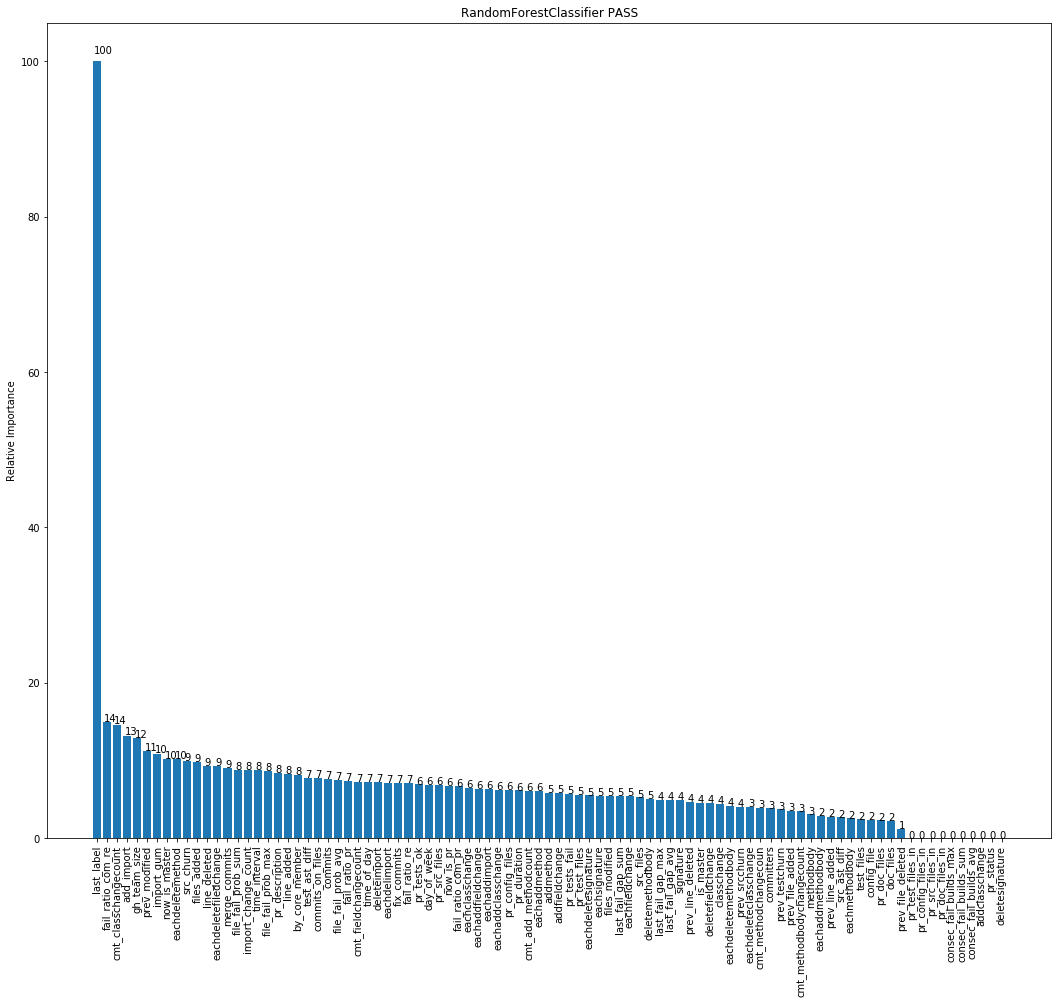

['last_label' 'fail_ratio_com_re' 'cmt_classchangecount' 'add_import'
 'gh_team_size' 'prev_modified' 'import_gum' 'now_is_master'
 'eachdeletemethod' 'src_churn' 'files_added' 'line_deleted'
 'eachdeletefiledchange' 'merge_commits' 'file_fail_prob_sum'
 'import_change_count' 'time_interval' 'file_fail_prob_max'
 'pr_description' 'line_added' 'by_core_member' 'test_ast_diff'
 'commits_on_files' 'commits' 'file_fail_prob_avg' 'fail_ratio_pr'
 'cmt_fieldchangecount' 'time_of_day' 'deleteimport' 'eachdelimport'
 'fix_commits' 'fail_ratio_re' 'pr_tests_ok' 'day_of_week' 'pr_src_files'
 'now_is_pr' 'fail_ratio_com_pr' 'eachclasschange' 'eachaddfieldchange'
 'eachaddimport' 'eachaddclasschange' 'pr_config_files' 'pr_duration'
 'cmt_add_methodcount' 'eachaddmethod' 'addmethod' 'addfieldchange'
 'pr_tests_fail' 'pr_test_files' 'eachdeletesignature' 'eachsignature'
 'files_modified' 'last_fail_gap_sum' 'eachfieldchange' 'src_files'
 'deletemethodbody' 'last_fail_gap_max' 'last_fail_gap_avg' 'si

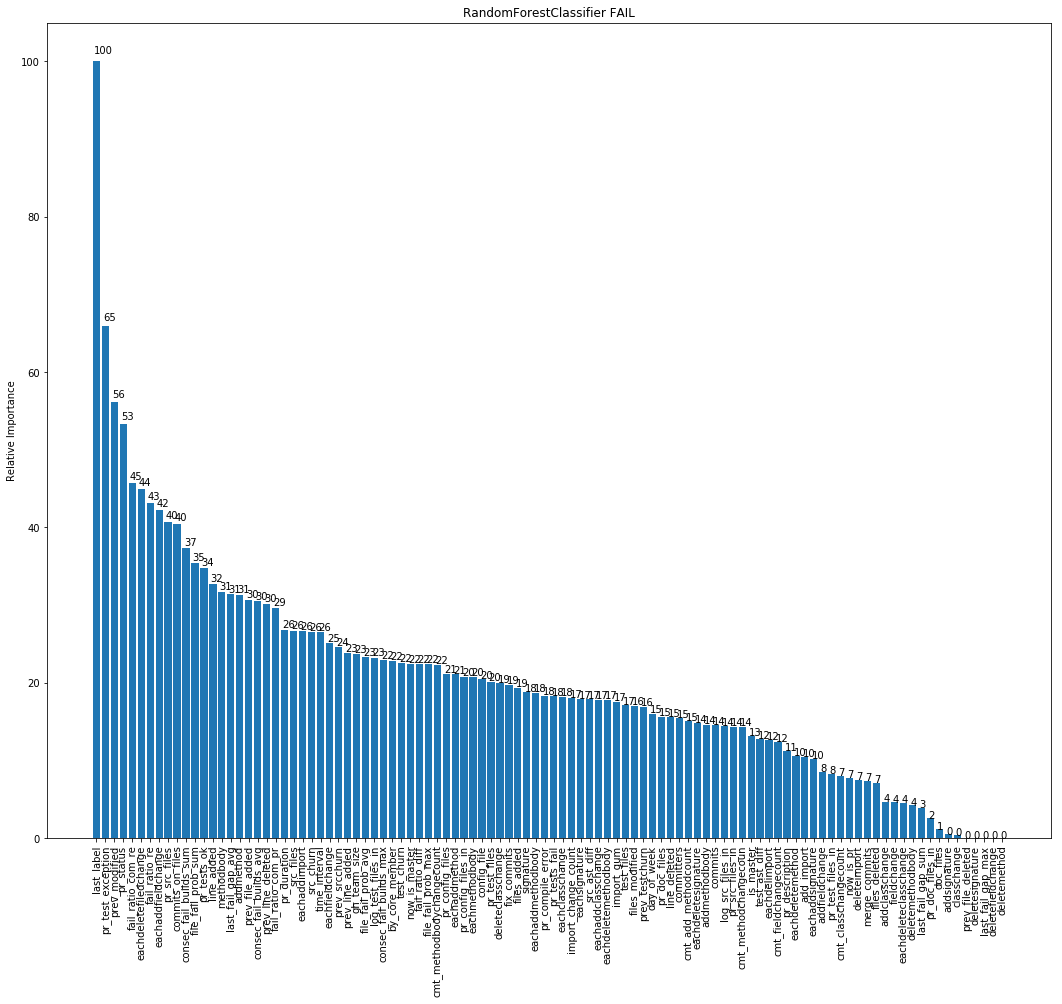

['last_label' 'pr_test_exception' 'prev_modified' 'pr_status'
 'fail_ratio_com_re' 'eachdeletefiledchange' 'fail_ratio_re'
 'eachaddfieldchange' 'pr_src_files' 'commits_on_files'
 'consec_fail_builds_sum' 'file_fail_prob_sum' 'pr_tests_ok' 'line_added'
 'methodbody' 'last_fail_gap_avg' 'addmethod' 'prev_file_added'
 'consec_fail_builds_avg' 'prev_line_deleted' 'fail_ratio_com_pr'
 'pr_duration' 'src_files' 'eachaddimport' 'src_churn' 'time_interval'
 'eachfieldchange' 'prev_srcchurn' 'prev_line_added' 'gh_team_size'
 'file_fail_prob_avg' 'log_test_files_in' 'consec_fail_builds_max'
 'by_core_member' 'test_churn' 'now_is_master' 'fail_ratio_diff'
 'file_fail_prob_max' 'cmt_methodbodychangecount' 'pr_config_files'
 'eachaddmethod' 'pr_config_files_in' 'eachmethodbody' 'config_file'
 'pr_test_files' 'deleteclasschange' 'fix_commits' 'files_added'
 'signature' 'eachaddmethodbody' 'pr_compile_error' 'pr_tests_fail'
 'eachclasschange' 'import_change_count' 'eachsignature' 'src_ast_diff'
 'ea

In [9]:
#model evaluation
from sklearn import preprocessing
from xgboost import XGBClassifier
            

def run(flag=None,select_flag=None,binary_flag=None,repeat_flag=None,sample_flag=None,selcect_pass=None,pnum=0,select_fail=None,fnum=0):
    dicts_origin={'test_0':[],'build_num':[],'file_modified':[],'file_added':[],'file_deleted':[],'line_added':[],'line_deleted':[],"infomation":[]}
    dicts_thresh={'ideal_time':[],'ideal_number':[],'saved_time':[],'save_number':[]}
    dic_info={}
    feature_importances_pass=defaultdict(list)
    feature_importances_fail=defaultdict(list)
   
    result_tosee=[]
    auc_roc=[]
    
    f10=[]
    f11=[]
    f1_macro=[]
    f1_micro=[]
    f1_weighted=[]
    recall0=[]
    recall1=[]
    recall_macro=[] 
    recall_micro=[] 
    recall_weighted=[] 
    precision0=[] 
    precision1=[] 
    precision_macro=[] 
    precision_micro=[] 
    precision_weighted=[]
    file_name=[]
    file_shape=[]
    ratios=[]
    last_pass_pred,last_pass_test=[],[]
    last_fail_pred,last_fail_test=[],[]
    file_list=get_listdir(os.path.join(os.path.abspath('.'),"structr/new_metric/gh_team_size/"))

    file_list_within=get_listdir(os.path.join(os.path.abspath('.'),"structr//essay_within/new_data_large/processed/gh_team_size/"))
    for i in range(0,len(file_list)):
            new_data=pd.read_csv(file_list[i],low_memory=False)
            within_data=pd.read_csv(file_list_within[i],low_memory=False)
            print(file_list_within[i])
            file_name.append(os.path.basename(file_list[i]))
            file_shape.append(new_data.shape[0])
            
# #             new_data.to_csv("./structr/new_metric/gh_team_size/"+os.path.basename(file_list[i]),header=True,index=False)
            duration_series=new_data['now_duration'].apply(lambda x: float(x))
            
            now_build_id=new_data['now_build_id']
            last_build_id=new_data['build_id']
#             print(new_data['time_interval']).values
            
#             for mm in new_data['time_interval']:
#                 if isinstance(mm,str):
#                     print(mm)
            
            for row in new_data.iteritems():
                ll = new_data[row[0]].values.tolist()
                if "\\N" in ll:
                    print(row[0])
                    print('yes')
            new_data=new_data.drop(['now_duration'],axis=1)
            
            
#             noeach_commit=[ 'eachsignature','eachdeletesignature','eachaddsignature','eachmethodbody','eachaddmethodbody',
#                  'eachdeletemethodbody','eachfieldchange','eachaddfieldchange','eachdeletefiledchange','eachclasschange',
#                  'eachaddclasschange','eachdeleteclasschange','eachaddmethod','eachdeletemethod','eachaddimport','eachdelimport', 'cmt_methodchangecoun','cmt_classchangecount','cmt_methodbodychangecount','cmt_fieldchangecount',
#              'cmt_add_methodcount']
#             noadd_delcommit=[ 'cmt_methodchangecoun','cmt_classchangecount','cmt_methodbodychangecount','cmt_fieldchangecount',
#              'cmt_add_methodcount','signature','deletesignature','addsignature','methodbody','addmethodbody','deletemethodbody','fieldchange','addfieldchange','deletefieldchange','classchange','addclasschange','deleteclasschange',
#                             'addmethod','deletemethod','add_import','deleteimport']
#             new_data=new_data.drop(noadd_delcommit,axis=1)

            '''
            计算fail_rate差值，这个可以体现fail rate的趋势
            '''
            new_data=fail_rate_diff(new_data)
#             new_data["eachsumsignature"]=new_data['eachsignature']+new_data['eachdeletesignature']+new_data['eachaddsignature']
#             new_data["eachsummethodbody"]=new_data['eachmethodbody']+new_data['eachaddmethodbody']+new_data['eachdeletemethodbody']
#             new_data["eachsumfield"]=new_data['eachfieldchange']+new_data['eachaddfieldchange']+new_data['eachdeletefiledchange']
#             new_data['eachsumclass']=new_data['eachclasschange']+new_data['eachaddclasschange']+new_data['eachdeleteclasschange']
#             new_data['eachsummethod']=new_data['eachaddmethod']+new_data['eachdeletemethod']
#compare1:feature
            new_data=new_data.drop([''])
            b=new_data[['pr_status','last_label','now_label','id','now_build_id']]
            new_data=new_data.drop(['pr_status','last_label','now_label','id','now_build_id'],axis=1)
            ix=new_data.index
#             new_data=new_data.drop(['import_gum','import_change_count'],axis=1)
            feature_names = list(new_data.columns.values)
            min_max_scaler = preprocessing.MinMaxScaler()
            a= min_max_scaler.fit_transform(new_data)
            a=pd.DataFrame(a,columns=feature_names,index=ix)
            new_data=pd.concat([a,b],axis=1)
#把细节数据组合
           

#             new_data=new_data.drop(['import_gum','import_change_count'],axis=1)
            feature_names = list(new_data.columns.values)

            
            new_data=binary_process(new_data,binary_flag,repeat_flag)

            new_data_fail=new_data[~new_data['last_label'].isin(["1"])]

            within_data_fail=within_data[~within_data['prev_tr_status'].isin(["1"])]
            if flag==0:
                test_size=math.ceil(new_data_fail.shape[0]/5)
                
                test_data=new_data.tail(test_size)
                train_data=new_data.drop(index=test_data.index)
            elif flag==1:
                test_size=math.ceil(new_data_fail.shape[0]/5)
                test_size_within=math.ceil(within_data_fail.shape[0]/5)
                within_data_ix=within_data.index
                new_data_ix=new_data.index
                test_data_begin=new_data_fail.tail(test_size)
                within_begin=within_data_fail.tail(test_size_within)
                ix=test_data_begin.index
                ix_within=within_begin.index
                within_test=within_data.iloc[ix_within[0]:within_data_ix[-1]+1,:]
                
                test_data=new_data.iloc[ix[0]:new_data_ix[-1]+1,:]
               
                m=list(set(within_test['all_id']).intersection(set(test_data["id"])))
#                 test_data=test_data[test_data["id"].isin(m)]
                within_test=within_test[within_test["all_id"].isin(m)]
                within_test=within_test.drop_duplicates(["all_id"],keep="last")
                within_test=within_test.drop_duplicates(["tr_build_id"],keep="last")
                mx=list(within_test['all_id'].values)
#                 mx=list(set(within_test['all_id']).intersection(set(test_data['id'])))
                test_data=test_data[test_data["id"].isin(mx)]
#                 test_data=test_data.drop_duplicates(["now_build_id"],keep="last")
                ix_test=test_data.index
                train_data=new_data.iloc[0:ix_test[0],:]
                train_data=train_data.drop(['id'],axis=1)
                
            else:
                test_size=math.ceil(new_data.shape[0]/5)
                test_data=new_data.tail(test_size)
                train_data=new_data.drop(index=test_data.index)
#             fail_test_size=math.ceil(new_data_fail.shape[0]/5)
            from sklearn.preprocessing import StandardScaler
#新的数据            
#             new_data_fail=new_data[~new_data['last_label'].isin(["1"])]
      
            new_data_fail=new_data[(new_data.last_label==0)|((new_data.last_label==1)&(new_data.now_label==0) ) ]
#去掉now_build_id       
            new_data_fail=new_data_fail.drop(["now_build_id",'id'],axis=1)
            print("data_fail_train",Counter(new_data_fail["now_label"]))
           
#新的数据
#             new_data_pass=new_data[~new_data['last_label'].isin(["0"])]
            new_data_pass=new_data[(new_data.last_label==1)|((new_data.last_label==0)&(new_data.now_label==0) ) ]
#去掉now_build_id 
            new_data_pass=new_data_pass.drop(['now_build_id','log_src_files','log_src_files_in','log_test_files',
             'log_test_files_in','pr_depend_error','pr_compile_error','pr_test_exception','pr_test_assert','pr_other_error','id'],axis=1)
            print("data_pass_train",Counter(new_data_pass["now_label"]))
           
#feature_selection
#新的数据   
            train_data = shuffle(train_data)   
#             X_pass_new=train_data[(train_data.last_label==1)]
#             X_fail_new=train_data[(train_data.last_label==0)]
            X_pass_new=train_data[(train_data.last_label==1)|((train_data.last_label==0)&(train_data.now_label==0) ) ]
            X_fail_new=train_data[(train_data.last_label==0)|((train_data.last_label==1)&(train_data.now_label==0) ) ]
            
            X_pass_new=X_pass_new.drop(["now_build_id"],axis=1)
            X_fail_new=X_fail_new.drop(["now_build_id"],axis=1)
            y_test=test_data['now_label']
            x_test=test_data.drop(['now_label'],axis=1)
            if select_flag==1:
                new_features_pass,new_features_fail=feature_selection(new_data_pass, new_data_fail,sample_flag)
#                 new_features_pass,new_features_fail=feature_selection(X_pass_new, X_fail_new,sample_flag)
            elif select_flag==2:
                new_features_pass,new_features_fail=feature_selection2(new_data_pass, new_data_fail,sample_flag,selcect_pass,pnum,select_fail,fnum)
            
            elif select_flag==3:
                new_features_pass,new_features_fail=feature_selection_cv(new_data_pass, new_data_fail)
            elif select_flag==4:
                new_features_pass,new_features_fail=feature_selection_thresh(X_pass_new, X_fail_new,test_data)
            else:

                new_features_pass=new_data_pass.drop(['now_label'],axis=1).columns.values
                new_features_fail=new_data_fail.drop(['now_label'],axis=1).columns.values
 
   
#             train_data = shuffle(train_data)
            
            
#             X_pass_new.drop(['log_error_num','modif_num','error_modified','log_error_num','error_modified','modif_num','err_type1','err_type2','err_type3','error_type'],aix)
            y_pass=X_pass_new['now_label']
#             X_pass=X_pass_new.drop(['now_label'],axis=1)
            X_pass=X_pass_new.drop(['now_label'],axis=1)[new_features_pass]
            print("data_fail_train.shape",X_pass.shape[1])
#             X_pass=X_pass[new_features_pass]
            
            y_fail=X_fail_new['now_label']
#             X_fail=X_fail_new.drop(['now_label'],axis=1)
            X_fail=X_fail_new.drop(['now_label'],axis=1)[new_features_fail]
            print("data_pass_train.shape", X_fail.shape[1])
#             X_fail=X_fail[new_features_fail]
            x_fail_columns=list(X_fail.columns.values)
           
            
#             RF0=RandomForestClassifier(oob_score=True,criterion='entropy',random_state=10,class_weight='balanced',max_depth=16,n_estimators=40)
            RF0 = XGBClassifier() # 载入模型（模型命名为model)
            RF1 =XGBClassifier()
#             RF1=RandomForestClassifier(oob_score=True,criterion='entropy',random_state=10,class_weight='balanced',max_depth=10,n_estimators=40)
        
            print(os.path.basename(file_list[i]),Counter(y_test))
            from sklearn.metrics.scorer import make_scorer,f1_score,recall_score,precision_score
            if sample_flag=='rus':
                print("rus====")
                rus = RandomOverSampler(random_state=None)
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            elif sample_flag=='smoteen':
                rus= SMOTEENN()
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            elif sample_flag=='smote':
                print("smote====")
                rus=SMOTE()
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            elif sample_flag=='under':
                rus=RandomUnderSampler(random_state=None)
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            else:

                x_train_PASS, y_train_PASS  = X_pass,y_pass
                x_train_Fail,y_train_Fail=X_fail,y_fail           
#             rus = rus=RandomOverSampler()
#             x_train_Fail,y_train_Fail=rus.fit_sample(x_train_Fail,y_train_Fail)#配合xgboost

#             x_train_Fail=pd.DataFrame(x_train_Fail,columns=new_features_fail)
#             y_train_Fail=pd.DataFrame(y_train_Fail,columns=['now_label'])
#拆分验证集 
            skf = StratifiedKFold(n_splits=5)
            for train, test in skf.split(X_pass,y_pass): 
   

                    X_train_passeva,X_test_passeva =X_pass.iloc[train], X_pass.iloc[test]  #series 用iloc
                    y_train_passeva,y_test_passeva = y_pass.iloc[train], y_pass.iloc[test] #series 用iloc
                    #验证集
            for train, test in skf.split(X_fail,y_fail): 
   

                    X_train_faileva,X_test_faileva =X_fail.iloc[train], X_fail.iloc[test]  #series 用iloc
                    y_train_faileva,y_test_faileva = y_fail.iloc[train], y_fail.iloc[test] #series 用iloc
                    #验证集
            rf_pass_eva=RF1.fit(X_train_passeva,y_train_passeva)
            proba_thresh_pass=find_proba_thresh(rf_pass_eva,X_test_passeva,y_test_passeva,1)
            rf_fail_eva=RF0.fit(X_train_faileva,y_train_faileva)
#             proba_thresh_fail=find_proba_thresh(rf_fail_eva,X_train_faileva,y_train_faileva)
            proba_thresh_fail=find_proba_thresh(rf_fail_eva,X_test_faileva,y_test_faileva,0)
            rf_pass=RF1.fit(x_train_PASS,y_train_PASS )
            
            joblib.dump(rf_pass,'./model2/rf_pass.model')
#             x_train_resample, y_train_resample  = rus.fit_sample(X_fail,y_fail)
            rf_fail=RF0.fit(x_train_Fail,y_train_Fail)
            feature_num=0
            
            for key in new_features_pass:
                feature_importances_pass[key].append(RF1.feature_importances_[feature_num])
                feature_num+=1
            feature_num=0
            for key in new_features_fail:
                feature_importances_fail[key].append(RF0.feature_importances_[feature_num])
                feature_num+=1
            joblib.dump(rf_fail,'./model2/rf_fail.model')  
            
            model_flag,dict_flag, line_count_flag=0,0,0
            build_number=0
            build_id=0
            file_modified=0
            file_added=0
            file_deleted=0
            line_added=0
            line_deleted=0
            tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
            count=0
            y_pred_collect=[]
            y_last_collect=[]
            predict_proba=[]
            ix=y_test.index
#             RF0=joblib.load('./model/rf_fail.model')
#             RF1=joblib.load('./model/rf_pass.model')
            now_build_id=now_build_id[ix]
            duration_series=duration_series[ix]
            last_build_id=last_build_id[ix]
            dic={}
            y_pred_collect,y_last_collect,y_test_collect,dicts_origin,dic_info,duration_collect,predict_proba=test_all(x_test,y_test,now_build_id,last_build_id,duration_series)
            
#             for number in x_test.index:#fail
#                 test_line=x_test.loc[[number]]
#                 if count==0:
#                     if test_line['last_label'].values[0]==0:
# #                             RF=joblib.load('./model/rf_fail.model')

#                         test_line1=test_line[new_features_fail]
                        
#                         y_pred=[1 if RF0.predict_proba(test_line1)[:,1]>proba_thresh_fail else 0]#ndarry
                        
#                         predict_proba.append(RF0.predict_proba(test_line1)[:,1]) 
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
#                         if y_pred[0]==0:
#                             model_flag=0
#                             line_count_flag=0
#                             dict_flag=0
#                     else:
# #                             RF=joblib.load('./model/rf_pass.model')

#                         test_line1=test_line[new_features_pass]
# #                         y_pred=RF1.predict(test_line1)
#                         y_pred=[1 if RF1.predict_proba(test_line1)[:,1]>proba_thresh_pass else 0]#ndarry
#                         predict_proba.append(RF1.predict_proba(test_line1)[:,1])
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
#                         if y_pred[0]==0:
#                             if y_test[number]==0:
#                                 model_flag=0
#                             else:
#                                 model_flag=0
#                             line_count_flag=0
                            
#                             dict_flag=0
#                     count+=1
# #                     y_pred=get_bestthresh(y_test,y_pred,pred_proba)
#                     y_pred_collect.append(y_pred[0])
#                     y_last_collect.append(test_line['last_label'].values[0])
# #                     if dict_flag==1:
# #                         dic[build_id]=[]
#                 else:
#                     if line_count_flag==1 and count>=1:
#                         file_modified+=test_line['files_modified'].values[0]
#                         file_added+=test_line['files_added'].values[0]
#                         file_deleted+=test_line['files_deleted'].values[0]
#                         line_added+=test_line['line_added'].values[0]
#                         line_deleted+=test_line['line_deleted'].values[0]
#                         build_number+=1
#                         tmp_build_number+=1
#                         tmp_file_modified+=test_line['files_modified'].values[0]
#                         tmp_file_added+=test_line['files_added'].values[0]
#                         tmp_file_deleted+=test_line['files_deleted'].values[0]
#                         tmp_line_added+=test_line['line_added'].values[0]
#                         tmp_line_deleted+=test_line['line_deleted'].values[0]
                        
# #                     if model_flag==0:
#                     if test_line['last_label'].values[0]==0:
# #                             RF0=joblib.load('./model/rf_fail.model')
# #                         test_line['last_label']=0
#                         test_line1=test_line[new_features_fail]
# #                         y_pred=RF0.predict(test_line1)#ndarry
#                         y_pred=[1 if RF0.predict_proba(test_line1)[:,1]>proba_thresh_fail else 0]#ndarry
#                         predict_proba.append(RF0.predict_proba(test_line1)[:,1])
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
                    
#                         if y_pred[0]==0:
#                             if y_test[number]==0:
#                                 model_flag=0
#                             else:
#                                 model_flag=1
#                             line_count_flag=0
#                             dict_flag=0
#                             if build_id!=0:
#                                 dic[number]=[tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted]
#                                 tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
#                             build_id=0
#                         count+=1
#                         y_pred_collect.append(y_pred[0])
#                         y_last_collect.append(test_line['last_label'].values[0])

#                     else:
                        
# #                         test_line['last_label']=1
# #                             RF1=joblib.load('./model/rf_pass.model')

#                         test_line1=test_line[new_features_pass]
    
# #                         y_pred=RF1.predict(test_line1)#ndarry
#                         y_pred=[1 if RF1.predict_proba(test_line1)[:,1]>proba_thresh_pass else 0]#ndarry
#                         predict_proba.append(RF1.predict_proba(test_line1)[:,1])
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
#                         if y_pred[0]==0:
#                             if y_test[number]==0:
#                                 model_flag=0
#                             else:
#                                 model_flag=1
#                             line_count_flag=0
#                             dict_flag=0
#                             if build_id!=0:
#                                 dic[number]=[tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted]
#                                 tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
#                             build_id=0
#                         count+=1
#                         y_pred_collect.append(y_pred[0])
#                         y_last_collect.append(test_line['last_label'].values[0])
#             tmp_arry=[]
# #             print("dic",dic)
            
#             tmp_arry.append(Counter(y_test)[0])
#             tmp_arry.append(build_number)
#             tmp_arry.append(file_modified)
#             tmp_arry.append(file_added)
#             tmp_arry.append(file_deleted)
#             tmp_arry.append(line_added)
#             tmp_arry.append(line_deleted) 
#             tmp_arry.append(dic)
#             tmp_count=0  
# #             print("tmp_arry:",tmp_arry)
#             for key in dicts_origin.keys():
#                     dicts_origin[key].append(tmp_arry[tmp_count])
#                     tmp_count+=1
# #             dicts_origin["infomation"].append(dic)
#             dic_info[os.path.basename(file_list[i])]=dic
#             ix=y_test.index
#             duration_series=duration_series[ix].values
#             y_test=y_test.values
            
            result_tosee.append(f1_score(y_test_collect,y_pred_collect,average='weighted'))
            auc_roc.append(roc_auc_score(y_test_collect,predict_proba,average='weighted'))
            for location in range(0,len(y_last_collect)):
                if y_last_collect[location]==1:
                    
                    last_pass_pred.append(y_pred_collect[location])
                    last_pass_test.append(y_test_collect[location])
                else:
                    last_fail_pred.append(y_pred_collect[location])
                    last_fail_test.append(y_test_collect[location])
                    
                    
#             print(os.path.basename(file_list[i]),"f1_score",f1_score(y_test,y_pred_collect,average=None))

#             print('f1_weighted',f1_score(y_test,y_pred_collect,average='weighted'))

#             print('precison_weighted',precision_score(y_test,y_pred_collect,average='weighted'))
            
#             dicts_thresh=save_time(y_pred_collect,y_test,x_test,duration_series,dicts_thresh) 

            if len(f1_score(y_test_collect,y_pred_collect,average=None))==2:
                print(os.path.basename(file_list[i]),"f1_score",f1_score(y_test_collect,y_pred_collect,average=None))
#                 print(os.path.basename(file_list[i]),'f1_macro',f1_score(y_test,y_pred_collect,average='macro'))
#                 print('f1_micro',f1_score(y_test,y_pred_collect,average='micro'))
                print('f1_weighted',f1_score(y_test_collect,y_pred_collect,average='weighted'))
#                 print('recall',recall_score(y_test,y_pred_collect,average=None))
#                 print('recall_weighted',recall_score(y_test,y_pred_collect,average='weighted'))
#                 print('precision',precision_score(y_test,y_pred_collect,average=None))
                print('precison_weighted',precision_score(y_test_collect,y_pred_collect,average='weighted'))
                f10.append(f1_score(y_test_collect,y_pred_collect,average=None)[0])
                f11.append(f1_score(y_test_collect,y_pred_collect,average=None)[1])

                f1_macro.append(f1_score(y_test_collect,y_pred_collect,average='macro'))
                f1_micro.append(f1_score(y_test_collect,y_pred_collect,average='micro'))
                f1_weighted.append(f1_score(y_test_collect,y_pred_collect,average='weighted'))
                recall0.append(recall_score(y_test_collect,y_pred_collect,average=None)[0])
                recall1.append(recall_score(y_test_collect,y_pred_collect,average=None)[1])
                recall_macro.append(recall_score(y_test_collect,y_pred_collect,average='macro'))
                recall_micro.append(recall_score(y_test_collect,y_pred_collect,average='micro'))
                recall_weighted.append(recall_score(y_test_collect,y_pred_collect,average='weighted'))
                precision0.append(precision_score(y_test_collect,y_pred_collect,average=None)[0])
                precision1.append(precision_score(y_test_collect,y_pred_collect,average=None)[1])
                precision_macro.append(precision_score(y_test_collect,y_pred_collect,average='macro'))
                precision_micro.append(precision_score(y_test_collect,y_pred_collect,average='micro'))
                precision_weighted.append(precision_score(y_test_collect,y_pred_collect,average='weighted'))
                ratios.append([Counter(y_test_collect)[1],Counter(y_test_collect)[0]]) 
          
    list_importance_pass=[]
    list_importance_fail=[]

    print(len(f10))
    print(format(np.mean(f10),'.3f'))
    print(format(np.mean(f11),'.3f'))
    print(format(np.mean(f1_macro),'.3f'))
    print(format(np.mean(f1_micro),'.3f'))
    print(format(np.mean(f1_weighted),'.3f'))
    print(format(np.mean(recall0),'.3f'))
    print(format(np.mean(recall1),'.3f'))
    print(format(np.mean(recall_macro),'.3f'))
    print(format(np.mean(recall_micro),'.3f'))
    print(format(np.mean(recall_weighted),'.3f'))

    print(format(np.mean(precision0),'.3f'))
    print(format(np.mean(precision1),'.3f'))
    print(format(np.mean(precision_macro),'.3f'))
    print(format(np.mean(precision_micro),'.3f'))
    print(format(np.mean(precision_weighted),'.3f'))
    print(format(np.mean(ratios),'.3f') )  
    print(ratios) 
    print("auc:",np.mean(auc_roc))
    print(np.mean(ratios))
#     print("f1_weighted",result_tosee)
    test_count=[last_pass_test,last_fail_test]
    pred_count=[last_pass_pred,last_fail_pred]
    for mm in range(0,len(test_count)):
        unique_data = np.unique(test_count[mm])
        print(unique_data)
        resdata = []
        for ii in unique_data:
            resdata.append(test_count[mm].count(ii))
        if mm==0:
            print("all_pass",resdata)
        else:
            print("all_fail",resdata)
        all_insight(test_count[mm],pred_count[mm])
        
    for key,value in feature_importances_pass.items():
        list_importance_pass.append(np.mean(value))

    plot_feature_importances(np.array(list_importance_pass), 
                'RandomForestClassifier PASS',np.array(list(feature_importances_pass.keys())))

    for key,value in feature_importances_fail.items():
        list_importance_fail.append(np.mean(value))
    
    plot_feature_importances(np.array(list_importance_fail), 
                'RandomForestClassifier FAIL',np.array(list(feature_importances_fail.keys())))
    error_evalue='error_evalue_new.csv'
    
    (filepath,tempfilename) = os.path.split(file_list[0])
    np_array = np.array([file_name, result_tosee,file_shape]) 
    np_array.transpose() 
    c=np.transpose(np_array)

   
    new=pd.DataFrame(data=c)
    new.to_csv('./structr/new_metric/result/f1_score_28_thresh.csv',index=False)
        
#     result_csv(data_list,resultname,indexs,colums,filepath)
#     result_csv(data_list_thresh,resultname_thresh,indexs,colums,filepath)
#     result_csv(dicts_origin,save_time_origin,colums,None,filepath)
#     result_csv(dicts_thresh,save_time_thresh,colums,None,filepath) 
    
#     result_csv(dicts_origin,file_name,error_evalue,'mix', None,filepath)  
#     result_csv(dicts_thresh,file_name,"savetime_new.csv",'mix',None,filepath)
#     print(dicts_origin)  
#     print(dic_info)
#run(flag=None,select_flag=None,binary_flag=None,repeat_flag=None,sample_flag=None,selcect_pass=None,select_fail=None,pnum=0,fnum=0):              
run(1,2,0,0,0,'f_classif',20,'chi2',25)  
#f_classif

In [ ]:
#model evaluation xgboost


def run(flag=None,select_flag=None,binary_flag=None,repeat_flag=None,sample_flag=None,selcect_pass=None,pnum=0,select_fail=None,fnum=0):
    dicts_origin={'test_0':[],'build_num':[],'file_modified':[],'file_added':[],'file_deleted':[],'line_added':[],'line_deleted':[],"infomation":[]}
    dicts_thresh={'ideal_time':[],'ideal_number':[],'saved_time':[],'save_number':[]}
    dic_info={}
    feature_importances_pass=defaultdict(list)
    feature_importances_fail=defaultdict(list)
   
    result_tosee=[]
    auc_roc=[]
    
    f10=[]
    f11=[]
    f1_macro=[]
    f1_micro=[]
    f1_weighted=[]
    recall0=[]
    recall1=[]
    recall_macro=[] 
    recall_micro=[] 
    recall_weighted=[] 
    precision0=[] 
    precision1=[] 
    precision_macro=[] 
    precision_micro=[] 
    precision_weighted=[]
    file_name=[]
    file_shape=[]
    ratios=[]
    last_pass_pred,last_pass_test=[],[]
    last_fail_pred,last_fail_test=[],[]
    file_list=get_listdir(os.path.join(os.path.abspath('.'),"structr/new_metric/20_project/"))

    file_list_within=get_listdir(os.path.join(os.path.abspath('.'),"structr//essay_within/new_data_large/processed/20_project/"))
    for i in range(0,len(file_list)):
            new_data=pd.read_csv(file_list[i],low_memory=False)
            within_data=pd.read_csv(file_list_within[i],low_memory=False)
            print(file_list_within[i])
            file_name.append(os.path.basename(file_list[i]))
            file_shape.append(new_data.shape[0])
            
# #             new_data.to_csv("./structr/new_metric/gh_team_size/"+os.path.basename(file_list[i]),header=True,index=False)
            duration_series=new_data['now_duration'].apply(lambda x: float(x))
            
            now_build_id=new_data['now_build_id']
            last_build_id=new_data['build_id']
#             print(new_data['time_interval']).values
            
#             for mm in new_data['time_interval']:
#                 if isinstance(mm,str):
#                     print(mm)
            
            for row in new_data.iteritems():
                ll = new_data[row[0]].values.tolist()
                if "\\N" in ll:
                    print(row[0])
                    print('yes')
            new_data=new_data.drop(['now_duration'],axis=1)
            
            
            

            '''
            计算fail_rate差值，这个可以体现fail rate的趋势
            '''
            new_data=fail_rate_diff(new_data)
                

#             new_data=new_data.drop(['import_gum','import_change_count'],axis=1)
            feature_names = list(new_data.columns.values)

            
            new_data=binary_process(new_data,binary_flag,repeat_flag)

            new_data_fail=new_data[~new_data['last_label'].isin(["1"])]

            within_data_fail=within_data[~within_data['prev_tr_status'].isin(["1"])]
            if flag==0:
                test_size=math.ceil(new_data_fail.shape[0]/5)
                
                test_data=new_data.tail(test_size)
                train_data=new_data.drop(index=test_data.index)
            elif flag==1:
                test_size=math.ceil(new_data_fail.shape[0]/5)
                test_size_within=math.ceil(within_data_fail.shape[0]/5)
                within_data_ix=within_data.index
                new_data_ix=new_data.index
                test_data_begin=new_data_fail.tail(test_size)
                within_begin=within_data_fail.tail(test_size_within)
                ix=test_data_begin.index
                ix_within=within_begin.index
                within_test=within_data.iloc[ix_within[0]:within_data_ix[-1]+1,:]
                
                test_data=new_data.iloc[ix[0]:new_data_ix[-1]+1,:]
               
                m=list(set(within_test['all_id']).intersection(set(test_data["id"])))
#                 test_data=test_data[test_data["id"].isin(m)]
                within_test=within_test[within_test["all_id"].isin(m)]
                within_test=within_test.drop_duplicates(["all_id"],keep="last")
                within_test=within_test.drop_duplicates(["tr_build_id"],keep="last")
                mx=list(within_test['all_id'].values)
#                 mx=list(set(within_test['all_id']).intersection(set(test_data['id'])))
                test_data=test_data[test_data["id"].isin(mx)]
#                 test_data=test_data.drop_duplicates(["now_build_id"],keep="last")
                ix_test=test_data.index
                train_data=new_data.iloc[0:ix_test[0],:]
                train_data=train_data.drop(['id'],axis=1)
                
            else:
                test_size=math.ceil(new_data.shape[0]/5)
                test_data=new_data.tail(test_size)
                train_data=new_data.drop(index=test_data.index)
#             fail_test_size=math.ceil(new_data_fail.shape[0]/5)
            from sklearn.preprocessing import StandardScaler
#新的数据            
#             new_data_fail=new_data[~new_data['last_label'].isin(["1"])]

            new_data_fail=new_data[(new_data.last_label==0)|((new_data.last_label==1)&(new_data.now_label==0) ) ]
#去掉now_build_id       
            new_data_fail=new_data_fail.drop(["now_build_id",'id'],axis=1)
            print("data_fail_train",Counter(new_data_fail["now_label"]))
            print("data_fail_train.shape",new_data_fail.shape[1])
#新的数据
#             new_data_pass=new_data[~new_data['last_label'].isin(["0"])]
            new_data_pass=new_data[(new_data.last_label==1)|((new_data.last_label==0)&(new_data.now_label==0) ) ]
#去掉now_build_id 
            new_data_pass=new_data_pass.drop(['now_build_id','log_src_files','log_src_files_in','log_test_files',
             'log_test_files_in','pr_depend_error','pr_compile_error','pr_test_exception','pr_test_assert','pr_other_error','id'],axis=1)
            print("data_pass_train",Counter(new_data_pass["now_label"]))
            print("data_pass_train.shape",new_data_pass.shape[1])
#feature_selection
#新的数据            
            X_pass_new=train_data[(train_data.last_label==1)|((train_data.last_label==0)&(train_data.now_label==0) ) ]
            X_fail_new=train_data[(train_data.last_label==0)|((train_data.last_label==1)&(train_data.now_label==0) ) ]
            if select_flag==1:#select from model
                new_features_pass,new_features_fail=feature_selection_thresh(new_data_pass, new_data_fail,sample_flag)
#                 new_features_pass,new_features_fail=feature_selection(X_pass_new, X_fail_new,sample_flag)
            elif select_flag==2:
                new_features_pass,new_features_fail=feature_selection2(new_data_pass, new_data_fail,sample_flag,selcect_pass,pnum,select_fail,fnum)
            
            elif select_flag==3:
                new_features_pass,new_features_fail=feature_selection_cv(new_data_pass, new_data_fail)
            else:

                new_features_pass=new_data_pass.drop(['now_label'],axis=1).columns.values
                new_features_fail=new_data_fail.drop(['now_label'],axis=1).columns.values
 
   
#             train_data = shuffle(train_data)
            
            
#             X_pass_new.drop(['log_error_num','modif_num','error_modified','log_error_num','error_modified','modif_num','err_type1','err_type2','err_type3','error_type'],aix)
            y_pass=X_pass_new['now_label']
#             X_pass=X_pass_new.drop(['now_label'],axis=1)
            X_pass=X_pass_new.drop(['now_label'],axis=1)[new_features_pass]
#             X_pass=X_pass[new_features_pass]
            
            y_fail=X_fail_new['now_label']
#             X_fail=X_fail_new.drop(['now_label'],axis=1)
            X_fail=X_fail_new.drop(['now_label'],axis=1)[new_features_fail]
#             X_fail=X_fail[new_features_fail]
            
            y_test=test_data['now_label']
            x_test=test_data.drop(['now_label'],axis=1)
            from xgboost import XGBClassifier
            model0 = XGBClassifier() # 载入模型（模型命名为model)
            model1 = XGBClassifier()
             
#             RF0=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10,max_depth=16,n_estimators=40)
#             RF1=RandomForestClassifier(oob_score=True,criterion='entropy',class_weight='balanced',random_state=10,max_depth=10,n_estimators=40)
           
            print(os.path.basename(file_list[i]),Counter(y_test))
            from sklearn.metrics.scorer import make_scorer,f1_score,recall_score,precision_score
            if sample_flag=='rus':
                rus = RandomOverSampler(random_state=None)
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            elif sample_flag=='smoteen':
                rus= SMOTEENN()
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            elif sample_flag=='smote':
                rus=SMOTE()
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            elif sample_flag=='under':
                rus=RandomUnderSampler(random_state=None)
                x_train_PASS, y_train_PASS  = rus.fit_sample(X_pass,y_pass)
                x_train_Fail,y_train_Fail=rus.fit_sample(X_fail,y_fail)
            else:

                x_train_PASS, y_train_PASS  = X_pass,y_pass
                x_train_Fail,y_train_Fail=X_fail,y_fail
            
           

            rf_pass=model1.fit(x_train_PASS,y_train_PASS )            # 训练模型（训练集）
              
#             rf_pass=RF1.fit(x_train_PASS,y_train_PASS )
#             joblib.dump(rf_pass,'./model/rf_pass.model')
#             x_train_resample, y_train_resample  = rus.fit_sample(X_fail,y_fail)
            rf_fail=model0.fit(x_train_Fail,y_train_Fail)
            feature_num=0
            
            for key in new_features_pass:
                feature_importances_pass[key].append(rf_pass.feature_importances_[feature_num])
                feature_num+=1
            feature_num=0
            for key in new_features_fail:
                feature_importances_fail[key].append(rf_fail.feature_importances_[feature_num])
                feature_num+=1
            joblib.dump(rf_fail,'./model/rf_fail.model')  
            
            model_flag,dict_flag, line_count_flag=0,0,0
            build_number=0
            build_id=0
            file_modified=0
            file_added=0
            file_deleted=0
            line_added=0
            line_deleted=0
            tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
            count=0
            y_pred_collect=[]
            y_last_collect=[]
            predict_proba=[]
            ix=y_test.index
#             RF0=joblib.load('./model/rf_fail.model')
#             RF1=joblib.load('./model/rf_pass.model')
            now_build_id=now_build_id[ix]
            last_build_id=last_build_id[ix]
            dic={}
            y_pred_collect,y_last_collect,y_test_collect,dicts_origin,dic_info,duration_collect=test_all(x_test,y_test,now_build_id,last_build_id,duration_series)
#             for number in x_test.index:#fail
#                 test_line=x_test.loc[[number]]
#                 if count==0:
#                     if test_line['last_label'].values[0]==0:
# #                             RF=joblib.load('./model/rf_fail.model')

#                         test_line1=test_line[new_features_fail]
#                         y_pred=rf_fail.predict(test_line1)#ndarry
#                         predict_proba.append(rf_fail.predict_proba(test_line1)[:,0]) 
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
#                         if y_pred[0]==0:
#                             model_flag=0
#                             line_count_flag=0
#                             dict_flag=0
#                     else:
# #                             RF=joblib.load('./model/rf_pass.model')

#                         test_line1=test_line[new_features_pass]
#                         y_pred=rf_pass.predict(test_line1)#ndarry
#                         predict_proba.append(rf_pass.predict_proba(test_line1)[:,1])
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
#                         if y_pred[0]==0:
#                             if y_test[number]==0:
#                                 model_flag=0
#                             else:
#                                 model_flag=1
#                             line_count_flag=0
                            
#                             dict_flag=0
#                     count+=1
# #                     y_pred=get_bestthresh(y_test,y_pred,pred_proba)
#                     y_pred_collect.append(y_pred[0])
#                     y_last_collect.append(test_line['last_label'].values[0])
# #                     if dict_flag==1:
# #                         dic[build_id]=[]
#                 else:
#                     print("count>1")
#                     if line_count_flag==1 and count>=1:
#                         file_modified+=test_line['files_modified'].values[0]
#                         file_added+=test_line['files_added'].values[0]
#                         file_deleted+=test_line['files_deleted'].values[0]
#                         line_added+=test_line['line_added'].values[0]
#                         line_deleted+=test_line['line_deleted'].values[0]
#                         build_number+=1
#                         tmp_build_number+=1
#                         tmp_file_modified+=test_line['files_modified'].values[0]
#                         tmp_file_added+=test_line['files_added'].values[0]
#                         tmp_file_deleted+=test_line['files_deleted'].values[0]
#                         tmp_line_added+=test_line['line_added'].values[0]
#                         tmp_line_deleted+=test_line['line_deleted'].values[0]
                        
#                     if model_flag==0:
# #                     if test_line['last_label'].values[0]==0:
# #                             RF0=joblib.load('./model/rf_fail.model')
# #                         test_line['last_label']=0
#                         test_line1=test_line[new_features_fail]
#                         y_pred=rf_fail.predict(test_line1)#ndarry
#                         predict_proba.append(rf_fail.predict_proba(test_line1)[:,1])
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
                    
#                         if y_pred[0]==0:
#                             if y_test[number]==0:
#                                 model_flag=0
#                             else:
#                                 model_flag=1
#                             line_count_flag=0
#                             dict_flag=0
#                             if build_id!=0:
#                                 dic[number]=[tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted]
#                                 tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
#                             build_id=0
#                         count+=1
#                         y_pred_collect.append(y_pred[0])
#                         y_last_collect.append(test_line['last_label'].values[0])

#                     else:
                        
# #                         test_line['last_label']=1
# #                             RF1=joblib.load('./model/rf_pass.model')

#                         test_line1=test_line[new_features_pass]
#                         y_pred=rf_pass.predict(test_line1)#ndarry
#                         predict_proba.append(rf_pass.predict_proba(test_line1)[:,1])
#                         if  y_pred[0]==1 and y_test[number]==0:

#                             model_flag=1
#                             line_count_flag=1
#                             build_id=now_build_id[number]
#                             dict_flag=1
#                         if y_pred[0]==0:
#                             if y_test[number]==0:
#                                 model_flag=0
#                             else:
#                                 model_flag=1
#                             line_count_flag=0
#                             dict_flag=0
#                             if build_id!=0:
#                                 dic[number]=[tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted]
#                                 tmp_build_number,tmp_file_modified,tmp_file_added,tmp_file_deleted,tmp_line_added,tmp_line_deleted=0,0,0,0,0,0
#                             build_id=0
#                         count+=1
#                         y_pred_collect.append(y_pred[0])
#                         y_last_collect.append(test_line['last_label'].values[0])


#             tmp_arry=[]
# #             print("dic",dic)
            
#             tmp_arry.append(Counter(y_test)[0])
#             tmp_arry.append(build_number)
#             tmp_arry.append(file_modified)
#             tmp_arry.append(file_added)
#             tmp_arry.append(file_deleted)
#             tmp_arry.append(line_added)
#             tmp_arry.append(line_deleted) 
#             tmp_arry.append(dic)
#             tmp_count=0  
# #             print("tmp_arry:",tmp_arry)
#             for key in dicts_origin.keys():
#                     dicts_origin[key].append(tmp_arry[tmp_count])
#                     tmp_count+=1
#             dicts_origin["infomation"].append(dic)
#             dic_info[os.path.basename(file_list[i])]=dic
#             ix=y_test.index
#             duration_series=duration_series[ix].values
#             y_test_collect=y_test.values
            
            result_tosee.append(f1_score(y_test_collect,y_pred_collect,average='weighted'))
            auc_roc.append(roc_auc_score(y_test_collect,predict_proba,average='weighted'))
            for location in range(0,len(y_last_collect)):
                if y_last_collect[location]==1:
                    
                    last_pass_pred.append(y_pred_collect[location])
                    last_pass_test.append(y_test[location])
                else:
                    last_fail_pred.append(y_pred_collect[location])
                    last_fail_test.append(y_test[location])
                    
                    
#             print(os.path.basename(file_list[i]),"f1_score",f1_score(y_test,y_pred_collect,average=None))

#             print('f1_weighted',f1_score(y_test,y_pred_collect,average='weighted'))

#             print('precison_weighted',precision_score(y_test,y_pred_collect,average='weighted'))
            
            dicts_thresh=save_time(y_pred_collect,y_test_collect,x_test,duration_collect,dicts_thresh) 

            if len(f1_score(y_test_collect,y_pred_collect,average=None))==2:
                print(os.path.basename(file_list[i]),"f1_score",f1_score(y_test,y_pred_collect,average=None))
#                 print(os.path.basename(file_list[i]),'f1_macro',f1_score(y_test,y_pred_collect,average='macro'))
#                 print('f1_micro',f1_score(y_test,y_pred_collect,average='micro'))
                print('f1_weighted',f1_score(y_test_collect,y_pred_collect,average='weighted'))
#                 print('recall',recall_score(y_test,y_pred_collect,average=None))
#                 print('recall_weighted',recall_score(y_test,y_pred_collect,average='weighted'))
#                 print('precision',precision_score(y_test,y_pred_collect,average=None))
                print('precison_weighted',precision_score(y_test_collect,y_pred_collect,average='weighted'))
                f10.append(f1_score(y_test_collect,y_pred_collect,average=None)[0])
                f11.append(f1_score(y_test_collect,y_pred_collect,average=None)[1])

                f1_macro.append(f1_score(y_test_collect,y_pred_collect,average='macro'))
                f1_micro.append(f1_score(y_test_collect,y_pred_collect,average='micro'))
                f1_weighted.append(f1_score(y_test_collect,y_pred_collect,average='weighted'))
                recall0.append(recall_score(y_test_collect,y_pred_collect,average=None)[0])
                recall1.append(recall_score(y_test_collect,y_pred_collect,average=None)[1])
                recall_macro.append(recall_score(y_test_collect,y_pred_collect,average='macro'))
                recall_micro.append(recall_score(y_test_collect,y_pred_collect,average='micro'))
                recall_weighted.append(recall_score(y_test_collect,y_pred_collect,average='weighted'))
                precision0.append(precision_score(y_test_collect,y_pred_collect,average=None)[0])
                precision1.append(precision_score(y_test_collect,y_pred_collect,average=None)[1])
                precision_macro.append(precision_score(y_test_collect,y_pred_collect,average='macro'))
                precision_micro.append(precision_score(y_test_collect,y_pred_collect,average='micro'))
                precision_weighted.append(precision_score(y_test_collect,y_pred_collect,average='weighted'))
                ratios.append([Counter(y_test_collect)[1],Counter(y_test_collect)[0]]) 
          
    list_importance_pass=[]
    list_importance_fail=[]

    print(len(f10))
    print(format(np.mean(f10),'.3f'))
    print(format(np.mean(f11),'.3f'))
    print(format(np.mean(f1_macro),'.3f'))
    print(format(np.mean(f1_micro),'.3f'))
    print(format(np.mean(f1_weighted),'.3f'))
    print(format(np.mean(recall0),'.3f'))
    print(format(np.mean(recall1),'.3f'))
    print(format(np.mean(recall_macro),'.3f'))
    print(format(np.mean(recall_micro),'.3f'))
    print(format(np.mean(recall_weighted),'.3f'))

    print(format(np.mean(precision0),'.3f'))
    print(format(np.mean(precision1),'.3f'))
    print(format(np.mean(precision_macro),'.3f'))
    print(format(np.mean(precision_micro),'.3f'))
    print(format(np.mean(precision_weighted),'.3f'))
    print(format(np.mean(ratios),'.3f') )  
    print(ratios) 
    print("auc:",np.mean(auc_roc))
    print(np.mean(ratios))
#     print("f1_weighted",result_tosee)
    test_count=[last_pass_test,last_fail_test]
    pred_count=[last_pass_pred,last_fail_pred]
    for mm in range(0,len(test_count)):
        unique_data = np.unique(test_count[mm])
        print(unique_data)
        resdata = []
        for ii in unique_data:
            resdata.append(test_count[mm].count(ii))
        if mm==0:
            print("all_pass",resdata)
        else:
            print("all_fail",resdata)
        all_insight(test_count[mm],pred_count[mm])
        
    for key,value in feature_importances_pass.items():
        list_importance_pass.append(np.mean(value))

    plot_feature_importances(np.array(list_importance_pass), 
                'RandomForestClassifier PASS',np.array(list(feature_importances_pass.keys())))

    for key,value in feature_importances_fail.items():
        list_importance_fail.append(np.mean(value))
    
    plot_feature_importances(np.array(list_importance_fail), 
                'RandomForestClassifier FAIL',np.array(list(feature_importances_fail.keys())))
    error_evalue='error_evalue_new.csv'
    
    (filepath,tempfilename) = os.path.split(file_list[0])
    np_array = np.array([file_name, result_tosee,file_shape]) 
    np_array.transpose() 
    c=np.transpose(np_array)

   
    new=pd.DataFrame(data=c)
#     new.to_csv('./structr/new_metric/result_new/f1_score_28.csv',index=False)
        
#     result_csv(data_list,resultname,indexs,colums,filepath)
#     result_csv(data_list_thresh,resultname_thresh,indexs,colums,filepath)
#     result_csv(dicts_origin,save_time_origin,colums,None,filepath)
#     result_csv(dicts_thresh,save_time_thresh,colums,None,filepath) 
    
    result_csv(dicts_origin,file_name,error_evalue,'mix', None,filepath)  
    result_csv(dicts_thresh,file_name,"savetime_new.csv",'mix',None,filepath)
#     print(dicts_origin)  
#     print(dic_info)
#run(flag=None,select_flag=None,binary_flag=None,repeat_flag=None,sample_flag=None,selcect_pass=None,select_fail=None,pnum=0,fnum=0):              
run(1,1,0,0,0,'f_classif',25,'chi2',30)  
#f_classif